<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b>Machine learning - Mental Health</b></div>

<div align="center">
    <img src="https://img.freepik.com/fotos-gratis/mulher-de-angulo-baixo-com-cancro_23-2151064715.jpg?t=st=1732558227~exp=1732561827~hmac=d18c0a3c9db888c21f231e035d43660c1f4ac2c58f19481a1c20dd5dc9b950d9&w=740" />
</div>

### Business Problem: **"Understanding and Predicting Depression to Enhance Mental Health Interventions"**

#### Context
Mental health is a growing global concern, and understanding the factors that contribute to depression is critical for designing effective interventions. Organizations in the mental health sector aim to identify individuals at risk and provide timely assistance, but they often lack the tools to predict depression based on available data. The synthetic dataset derived from a mental health survey offers an opportunity to explore these factors and develop predictive models that can aid in early detection.

#### Problem Statement
How can organizations leverage data analytics to identify key factors associated with depression and predict its occurrence in individuals? Specifically:

1. Which variables have the strongest correlation with depression?

2. Can a machine learning model effectively predict whether an individual is likely to experience depression based on survey data?

3. How can these predictions inform policy-making or targeted mental health programs?

#### Objective

To develop a machine learning solution that:

1. Identifies key drivers of depression from the survey dataset.

2. Predicts the likelihood of depression for unseen data with high accuracy.

3. Provides actionable insights that stakeholders (mental health organizations, policymakers, healthcare providers) can use to design tailored mental health interventions.

#### Impact
By solving this problem, organizations can:
- Better allocate resources to at-risk populations.
- Create awareness campaigns targeted at specific risk factors.
- Monitor and evaluate the effectiveness of mental health programs using data-driven insights.

# **Part 1 - Import packages**

In [56]:
# Installing packages
!pip install -q watermark
!pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [7]:
# Import of libraries

# System libraries
import os
import re
import string
import unicodedata
import itertools
from collections import Counter

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.12
Author: Library versions

pandas    : 2.2.2
platform  : 1.0.8
watermark : 2.5.0
re        : 2.2.1
google    : 2.0.3
numpy     : 1.26.4
seaborn   : 0.13.2
plotly    : 5.24.1
matplotlib: 3.8.0



# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 2 - Database</b></div>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Nam4/Data_Mining_Applications/Project

/content/drive/MyDrive/Nam4/Data_Mining_Applications/Project


In [5]:
path_data = 'data/train.csv'

In [9]:
# Database
train_df = pd.read_csv(path_data)

# Viewing dataset
train_df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [10]:
# Viewing first 5 data
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [11]:
# Info data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [12]:
# Type data
train_df.dtypes

,0
id,int64
Name,object
Gender,object
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


In [13]:
# Viewing rows and columns
train_df.shape

(140700, 20)

In [14]:
# Targent
train_df.Depression.value_counts()

,count
Depression,
0,115133
1,25567


# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 3 - Data cleaning</b></div>

In [15]:
print("Checking for missing values in each column:")
print(train_df.isnull().sum())

Checking for missing values in each column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                  

In [16]:
# Checking the number of null values ​​in specific columns
print(train_df[['Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
                'Study Satisfaction', 'Job Satisfaction', 'Dietary Habits', 'Degree',
                'Financial Stress']].isnull().sum())

Profession             36630
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Dietary Habits             4
Degree                     2
Financial Stress           4
dtype: int64


In [17]:
null_percentage = train_df.isnull().sum() / len(train_df) * 100
print(null_percentage)

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                     

In [18]:
# Checks how many rows do not have null values in the specified columns
columns_with_nulls = ["Profession", "Academic Pressure", "Work Pressure",
                      "CGPA", "Study Satisfaction", "Job Satisfaction",
                      "Dietary Habits", "Degree", "Financial Stress"]

rows_without_nulls = train_df.dropna(subset=columns_with_nulls)
print(f"Original dataset size: {train_df.shape[0]} rows")
print(f"Rows remaining after dropping nulls: {rows_without_nulls.shape[0]} rows")

Original dataset size: 140700 rows
Rows remaining after dropping nulls: 0 rows


In [19]:
# Sets a threshold of 70% for null values
threshold = 0.7
columns_to_keep = train_df.columns[train_df.isnull().mean() < threshold]

# Removes columns with more than 70% null values
train_df = train_df[columns_to_keep]
print(f"Remaining columns: {train_df.columns}")

Remaining columns: Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Work Pressure',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [20]:
# Drop column id
train_df = train_df.drop(['id'], axis=1)

# Drop column Name
train_df = train_df.drop(['Name'], axis=1)
train_df.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [21]:
print(train_df.shape)  # Size of the dataset
print(train_df.isnull().sum())  # Remaining null values

(140700, 15)
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Work Pressure                            27918
Job Satisfaction                         27910
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                                   0
dtype: int64


In [22]:
# Filling null values with the mean (or median) for numerical columns
train_df["Work Pressure"] = train_df["Work Pressure"].fillna(train_df["Work Pressure"].median())
train_df["Job Satisfaction"] = train_df["Job Satisfaction"].fillna(train_df["Job Satisfaction"].median())

# Filling null values with a default category
train_df["Profession"] = train_df["Profession"].fillna("Unknown")
train_df["Degree"] = train_df["Degree"].fillna(train_df["Degree"].mode()[0])
train_df["Dietary Habits"] = train_df["Dietary Habits"].fillna(train_df["Dietary Habits"].mode()[0])
train_df["Financial Stress"] = train_df["Financial Stress"].fillna(train_df["Financial Stress"].mode()[0])

In [23]:
# Change types possible
train_df['Age'] = train_df['Age'].astype('int64')
train_df['Work Pressure'] = train_df['Work Pressure'].astype('int64')
train_df['Job Satisfaction'] = train_df['Job Satisfaction'].astype('int64')
train_df['Work/Study Hours'] = train_df['Work/Study Hours'].astype('int64')
train_df['Financial Stress'] = train_df['Financial Stress'].astype('int64')

In [24]:
train_df.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49,Ludhiana,Working Professional,Chef,5,2,More than 8 hours,Healthy,BHM,No,1,2,No,0
1,Male,26,Varanasi,Working Professional,Teacher,4,3,Less than 5 hours,Unhealthy,LLB,Yes,7,3,No,1
2,Male,33,Visakhapatnam,Student,Unknown,3,3,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1
3,Male,22,Mumbai,Working Professional,Teacher,5,1,Less than 5 hours,Moderate,BBA,Yes,10,1,Yes,1
4,Female,30,Kanpur,Working Professional,Business Analyst,1,1,5-6 hours,Unhealthy,BBA,Yes,9,4,Yes,0


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   Gender                                 140700 non-null  object
 1   Age                                    140700 non-null  int64 
 2   City                                   140700 non-null  object
 3   Working Professional or Student        140700 non-null  object
 4   Profession                             140700 non-null  object
 5   Work Pressure                          140700 non-null  int64 
 6   Job Satisfaction                       140700 non-null  int64 
 7   Sleep Duration                         140700 non-null  object
 8   Dietary Habits                         140700 non-null  object
 9   Degree                                 140700 non-null  object
 10  Have you ever had suicidal thoughts ?  140700 non-null  object
 11  

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 4 - Exploratory data analysis</b></div>

In [26]:
# Count the number of 'Unknown' values in the 'Profession' column
unknown_count = train_df['Profession'].value_counts()['Unknown']
print(f"Number of 'Unknown' entries in Profession: {unknown_count}")

Number of 'Unknown' entries in Profession: 36630


## **Target**

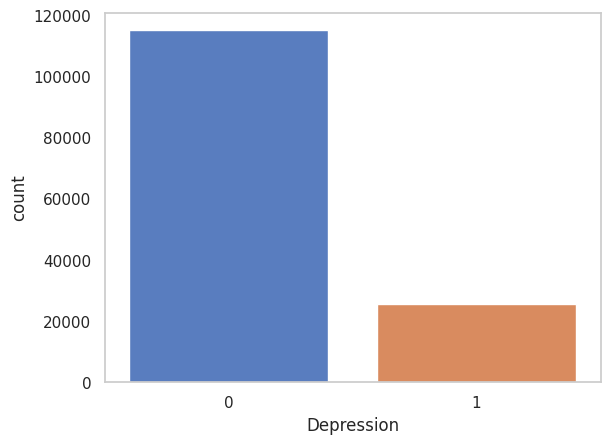

In [27]:
sns.countplot(x="Depression", data=train_df, palette='muted')
plt.grid(False)
plt.show()

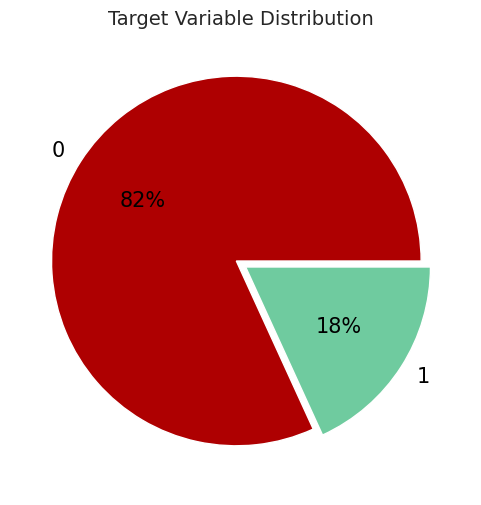

In [28]:
target_colors = [
    "#ae0001",
    "#6fcb9f",
]

plt.figure(figsize=(6, 6))
plt.pie(
    train_df["Depression"].value_counts(),
    labels=train_df["Depression"].value_counts().index,
    textprops={"fontsize": 15, "color": "black"},
    colors=target_colors,
    autopct="%.0f%%",
    explode=[0.03, 0.03],
)
plt.title("Target Variable Distribution", fontsize=14)
plt.show()

## **Numerical**

In [29]:
# Viewing descriptive statistics
train_df.describe()

,Age,Work Pressure,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000
mean,40.388621,2.999197,2.979481,6.252679,2.988955,0.181713
std,12.384099,1.258598,1.267912,3.853615,1.413623,0.385609
min,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000,1.000000


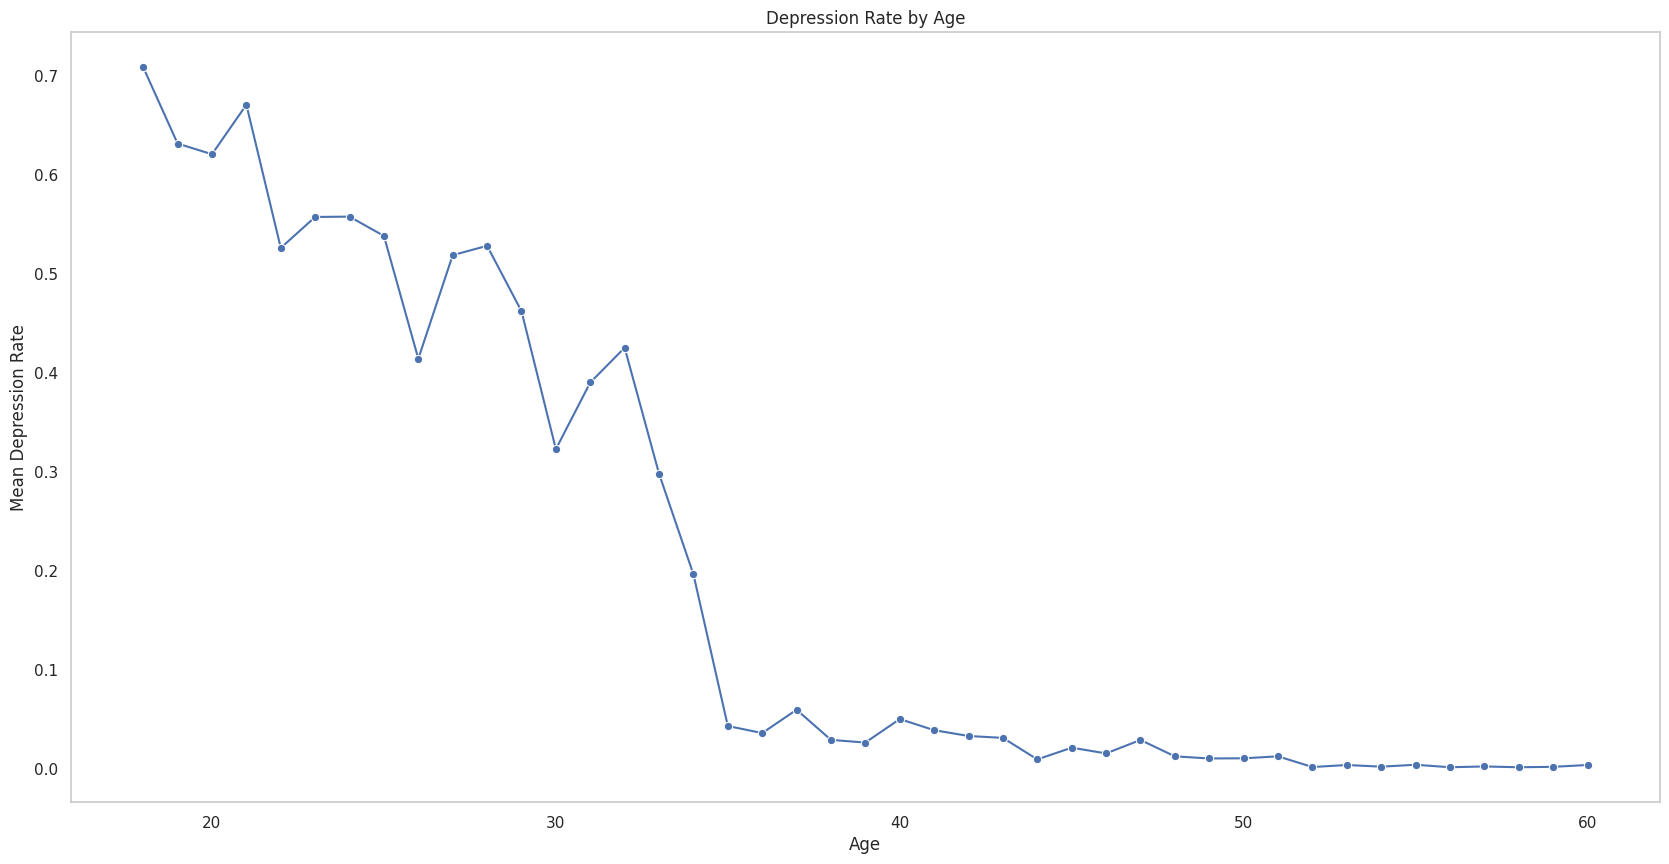

In [30]:
# Group by Age and calculate the mean depression rate
age_depression = train_df.groupby('Age')['Depression'].mean()

# Plot the relationship between Age and Depression
plt.figure(figsize=(20.5, 10))
sns.lineplot(x=age_depression.index, y=age_depression.values, marker='o', palette='muted')
plt.title("Depression Rate by Age")
plt.xlabel("Age")
plt.ylabel("Mean Depression Rate")
plt.grid()
plt.grid(False)
plt.show()

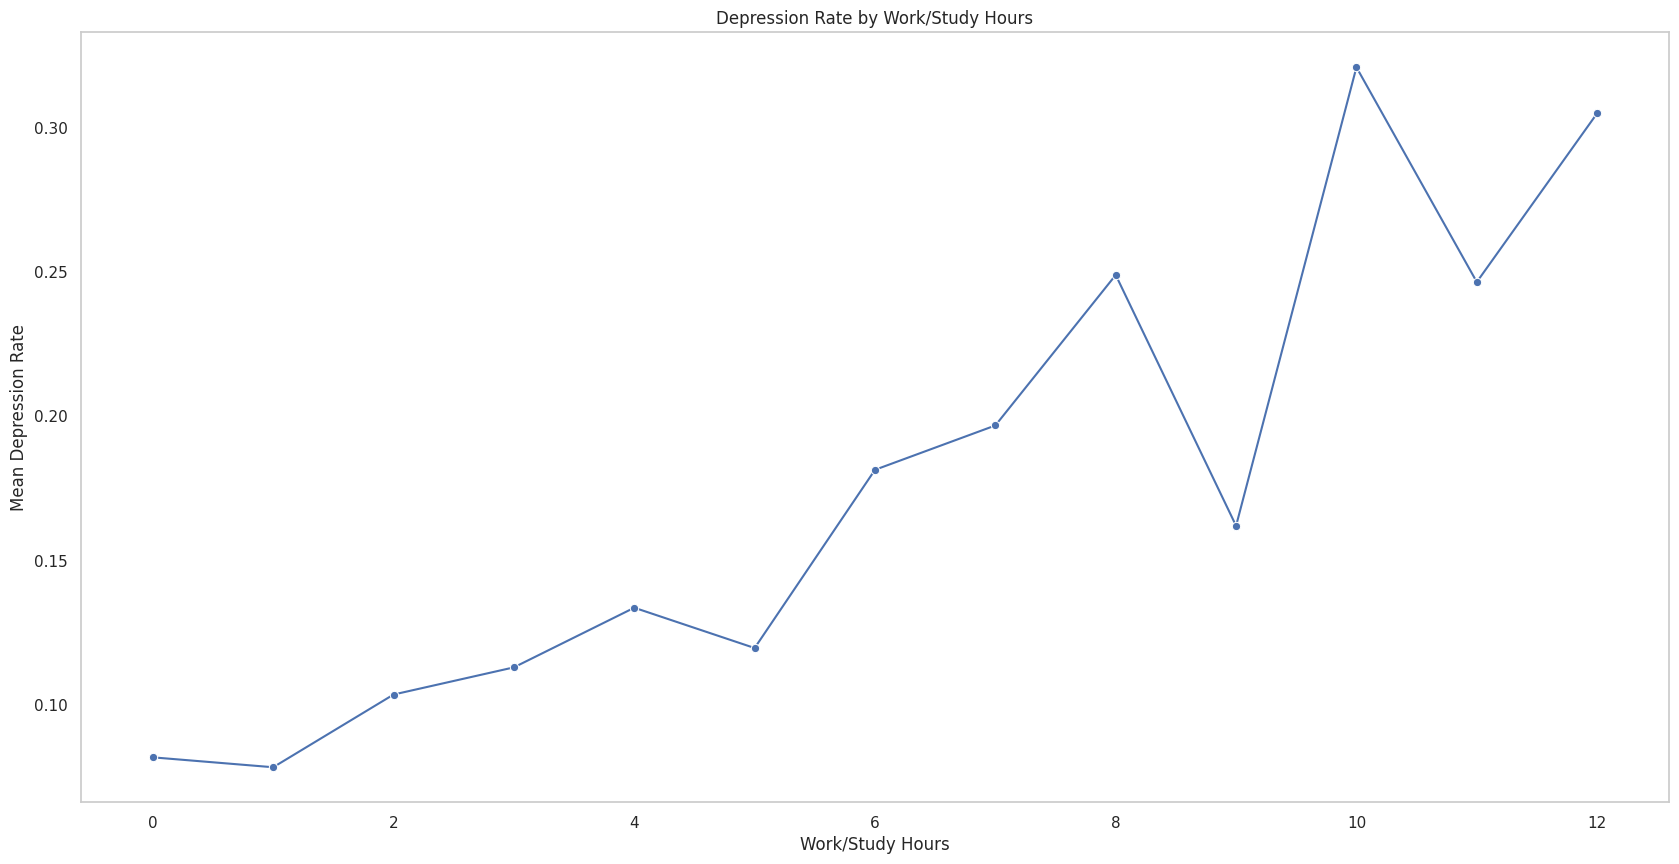

In [31]:
# Group by Work/Study Hours	 and calculate the mean depression rate
hours_depression = train_df.groupby('Work/Study Hours')['Depression'].mean()

# Plot the relationship between Age and Depression
plt.figure(figsize=(20.5, 10))
sns.lineplot(x=hours_depression.index, y=hours_depression.values, marker='o', palette='muted')
plt.title("Depression Rate by Work/Study Hours")
plt.xlabel("Work/Study Hours")
plt.ylabel("Mean Depression Rate")
plt.grid()
plt.grid(False)
plt.show()

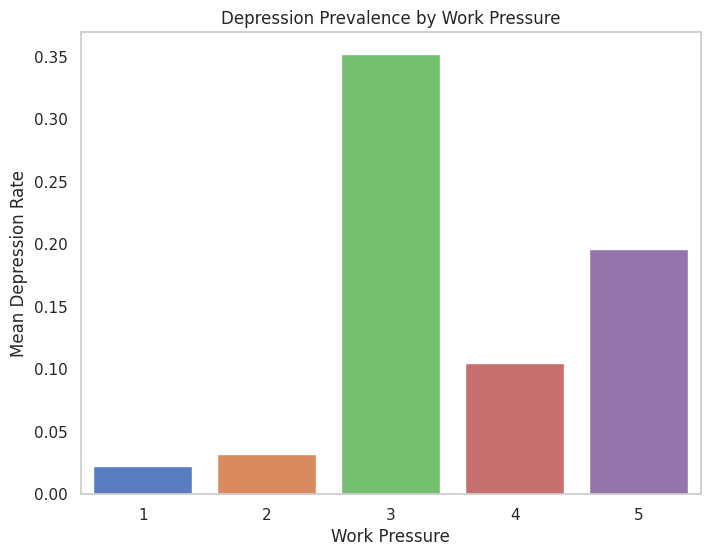

In [32]:
work_pressure_depression = train_df.groupby('Work Pressure')['Depression'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=work_pressure_depression.index, y=work_pressure_depression.values, palette='muted')
plt.title("Depression Prevalence by Work Pressure")
plt.xlabel("Work Pressure")
plt.ylabel("Mean Depression Rate")
plt.grid(False)
plt.show()

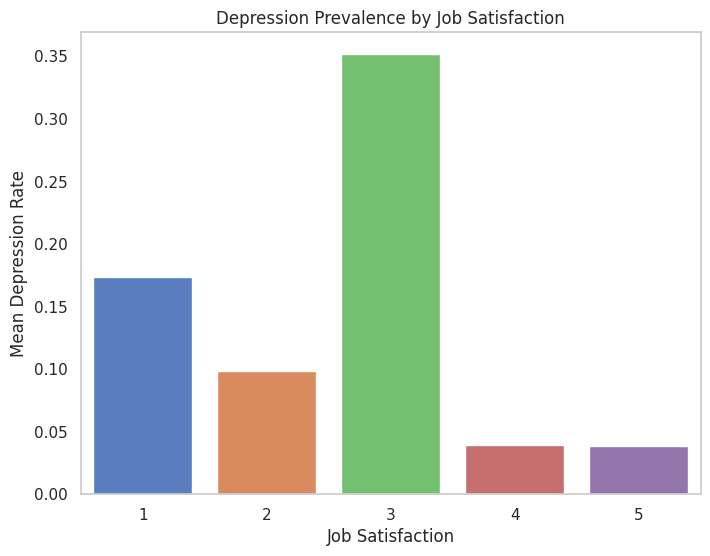

In [33]:
job_satisfaction_depression = train_df.groupby('Job Satisfaction')['Depression'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=job_satisfaction_depression.index, y=job_satisfaction_depression.values, palette='muted')
plt.title("Depression Prevalence by Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Mean Depression Rate")
plt.grid(False)
plt.show()

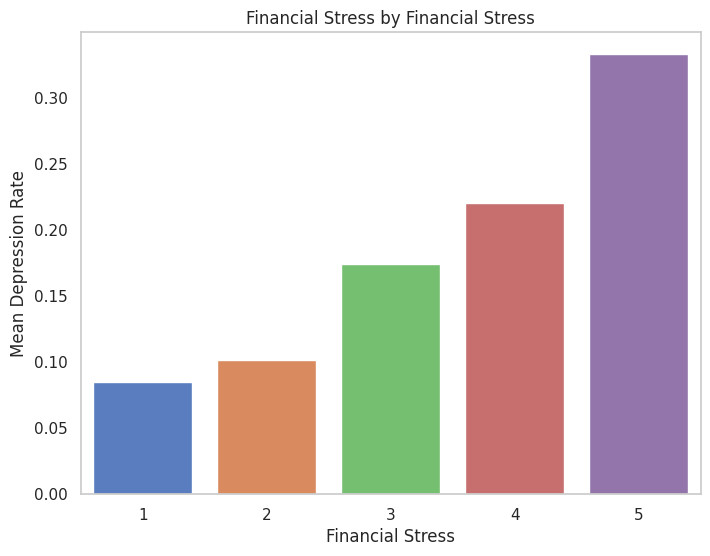

In [34]:
financial_stress_depression = train_df.groupby('Financial Stress')['Depression'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=financial_stress_depression.index, y=financial_stress_depression.values, palette='muted')
plt.title("Financial Stress by Financial Stress")
plt.xlabel("Financial Stress")
plt.ylabel("Mean Depression Rate")
plt.grid(False)
plt.show()

## **Categorical**

In [35]:
# Viewing descriptive statistics
train_df.describe(include="object")

,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,140700,140700,140700,140700,140700,140700,140700,140700,140700
unique,2,98,2,65,36,23,115,2,2
top,Male,Kalyan,Working Professional,Unknown,Less than 5 hours,Moderate,Class 12,No,No
freq,77464,6591,112799,36630,38784,49709,14731,71138,70758


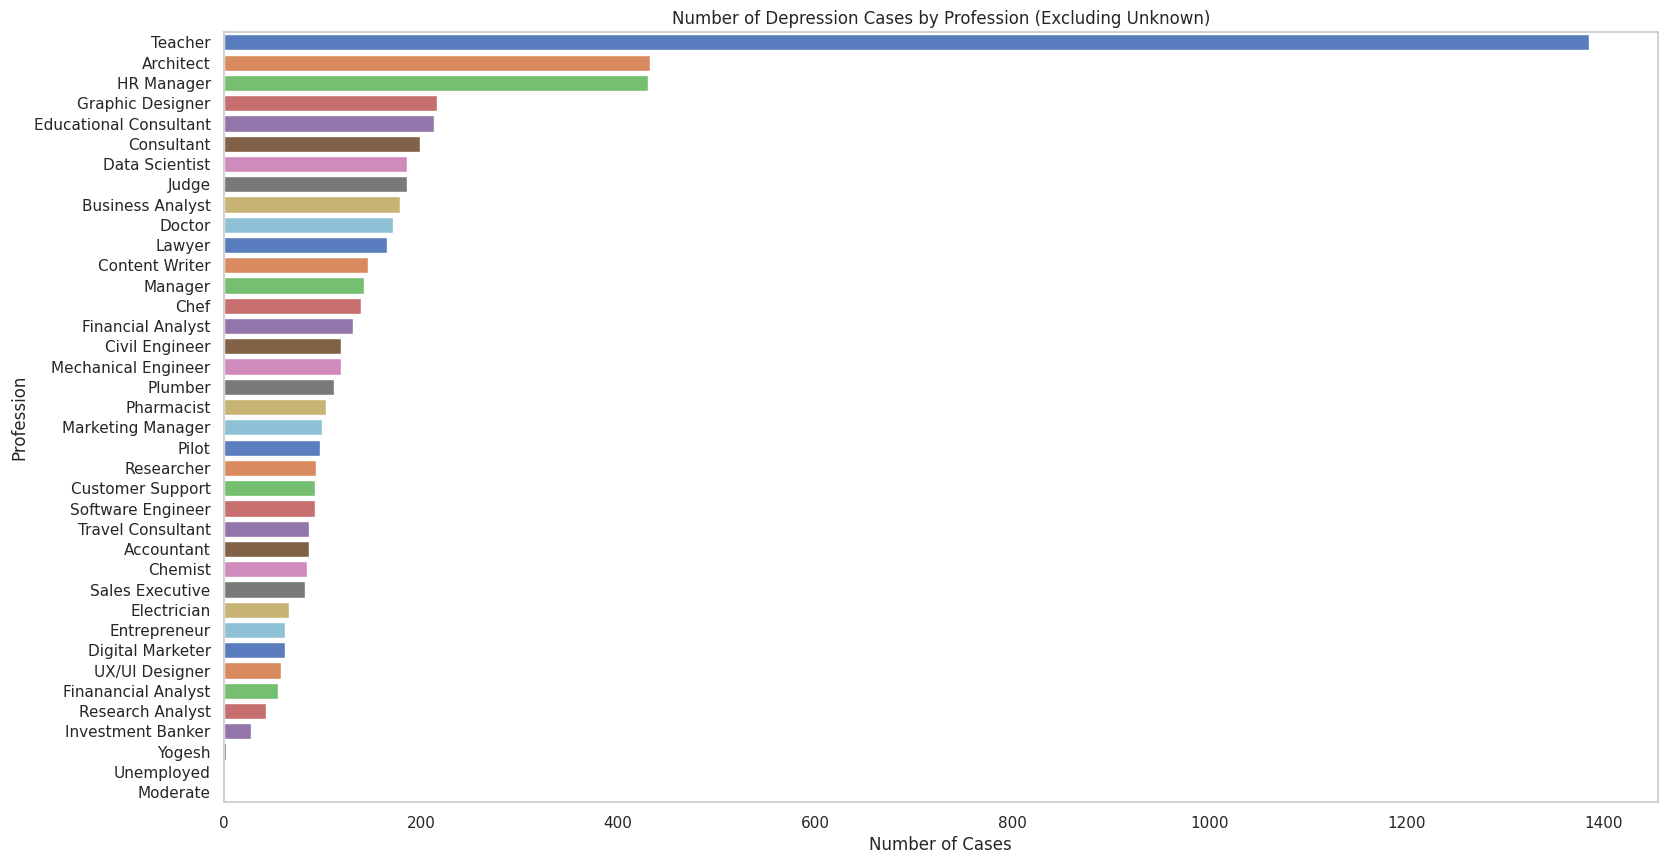

In [36]:
# Remove records with 'Unknown' to generate a clean plot
filtered_df = train_df[train_df['Profession'] != 'Unknown']

# Count the depression cases by profession
depression_cases = filtered_df[filtered_df['Depression'] == 1]
profession_counts = depression_cases['Profession'].value_counts()

# Create the bar chart
plt.figure(figsize=(18.5, 10))
sns.barplot(x=profession_counts.values, y=profession_counts.index, palette='muted')
plt.title("Number of Depression Cases by Profession (Excluding Unknown)")
plt.xlabel("Number of Cases")
plt.ylabel("Profession")
plt.grid(False)
plt.show()

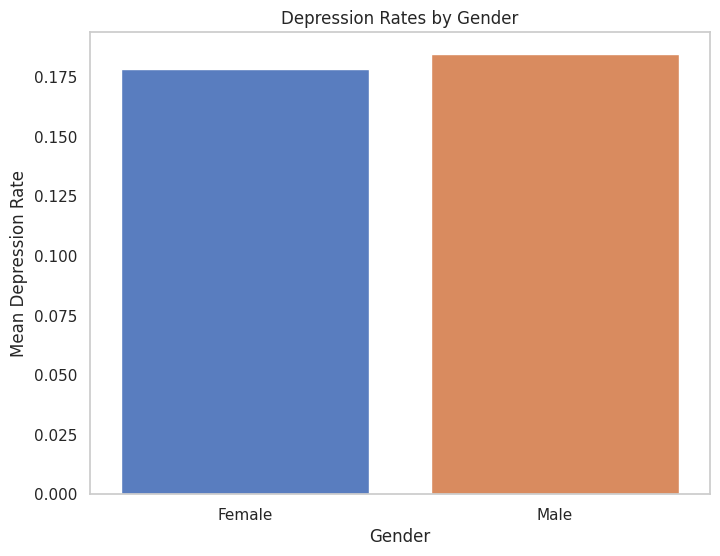

In [37]:
# Create a bar plot to visualize depression rates by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Depression', data=train_df, ci=None, palette='muted')
plt.title("Depression Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Depression Rate")
plt.grid(False)
plt.show()

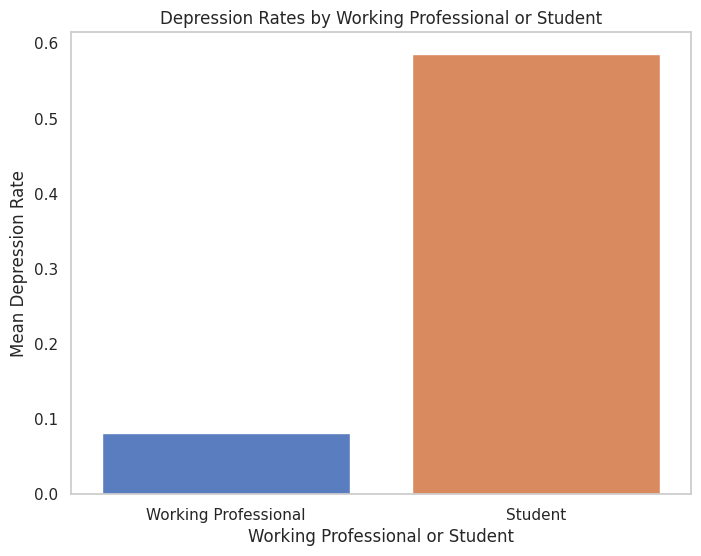

In [38]:
# Create a bar plot to visualize depression rates by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Working Professional or Student', y='Depression', data=train_df, ci=None, palette='muted')
plt.title("Depression Rates by Working Professional or Student")
plt.xlabel("Working Professional or Student")
plt.ylabel("Mean Depression Rate")
plt.grid(False)
plt.show()

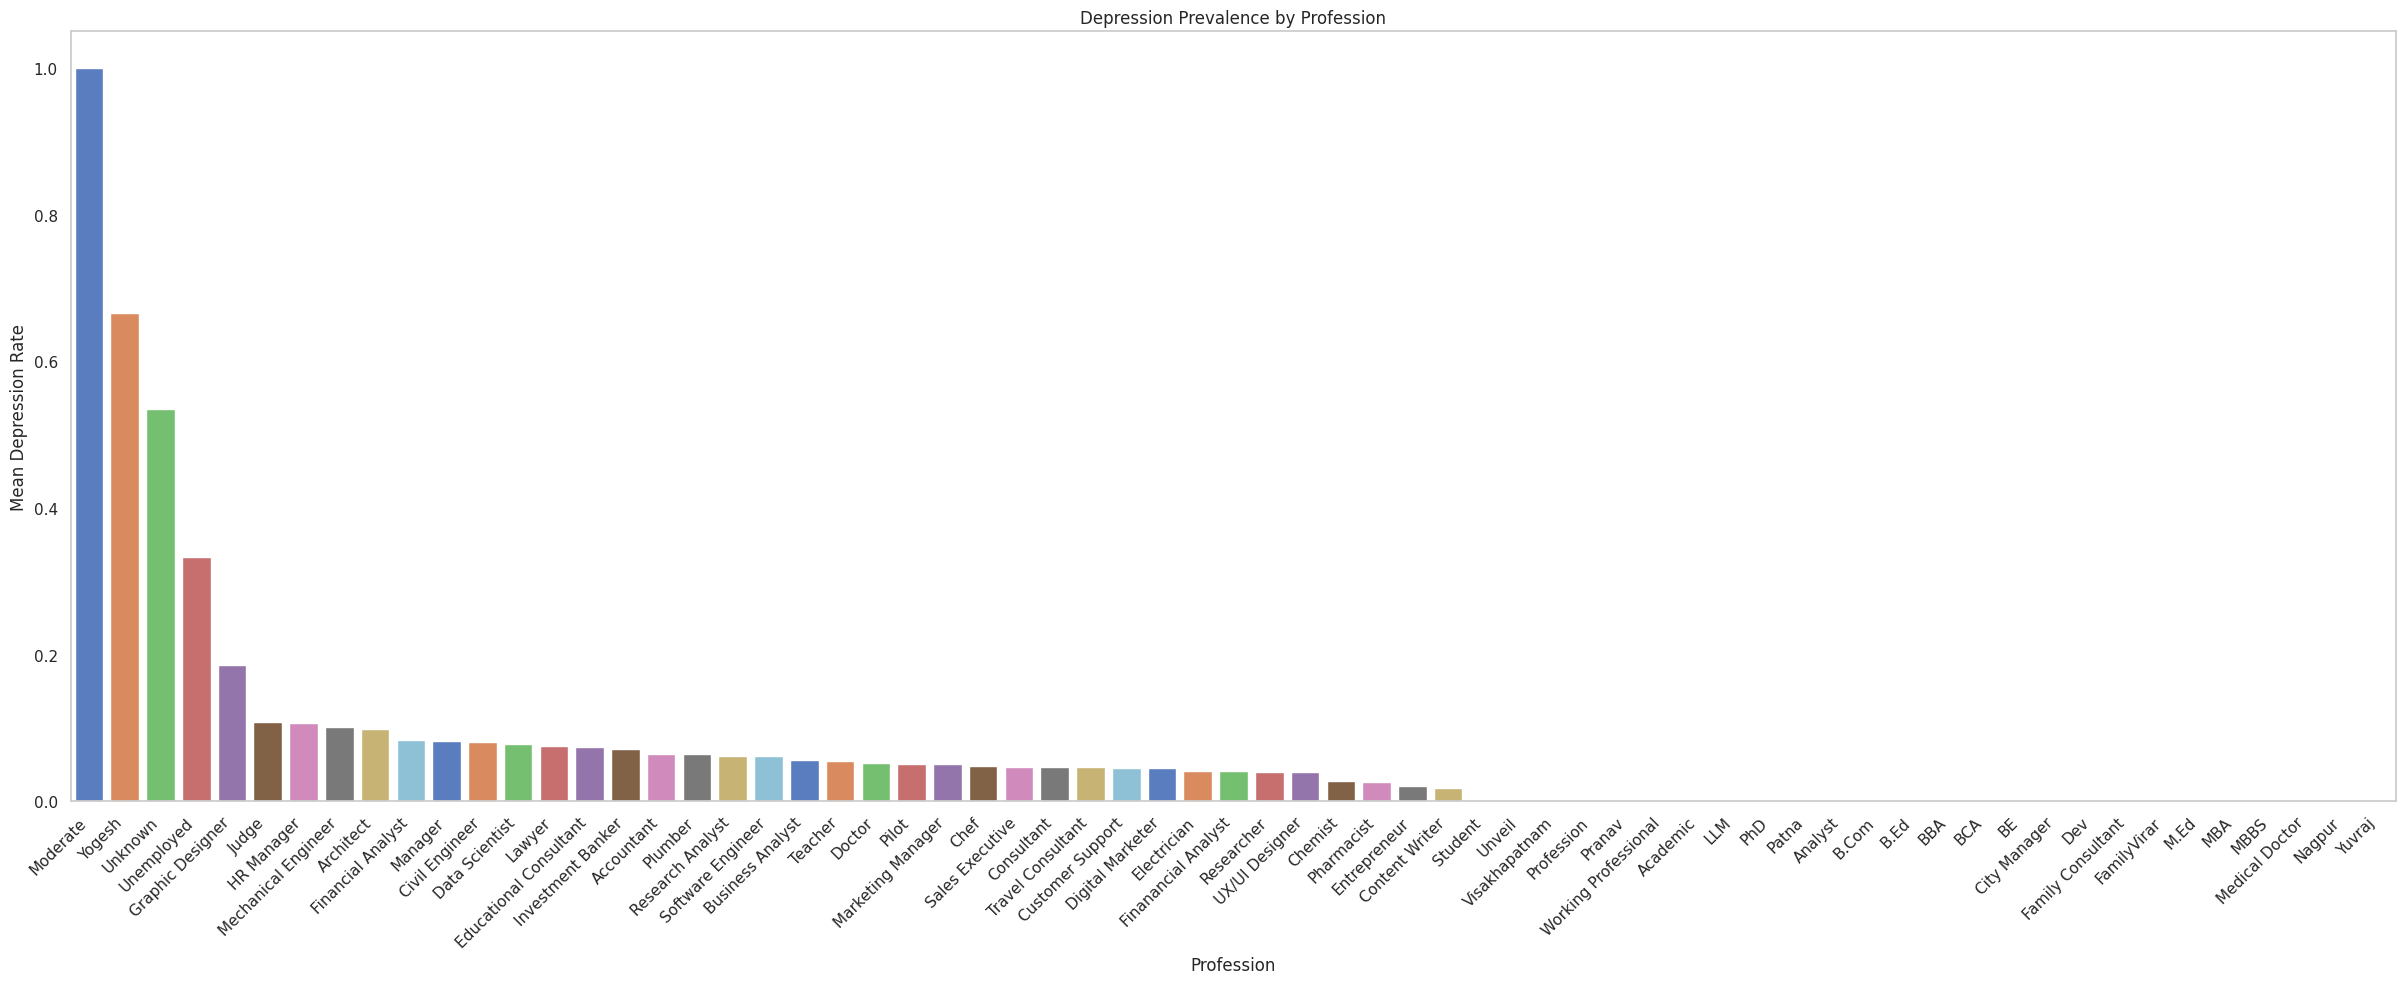

In [39]:
profession_depression = train_df.groupby('Profession')['Depression'].mean().sort_values(ascending=False)
# Visualize the prevalence of depression by profession
plt.figure(figsize=(30, 10))
sns.barplot(x=profession_depression.index, y=profession_depression.values, palette='muted')
plt.title("Depression Prevalence by Profession")
plt.xlabel("Profession")
plt.ylabel("Mean Depression Rate")
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

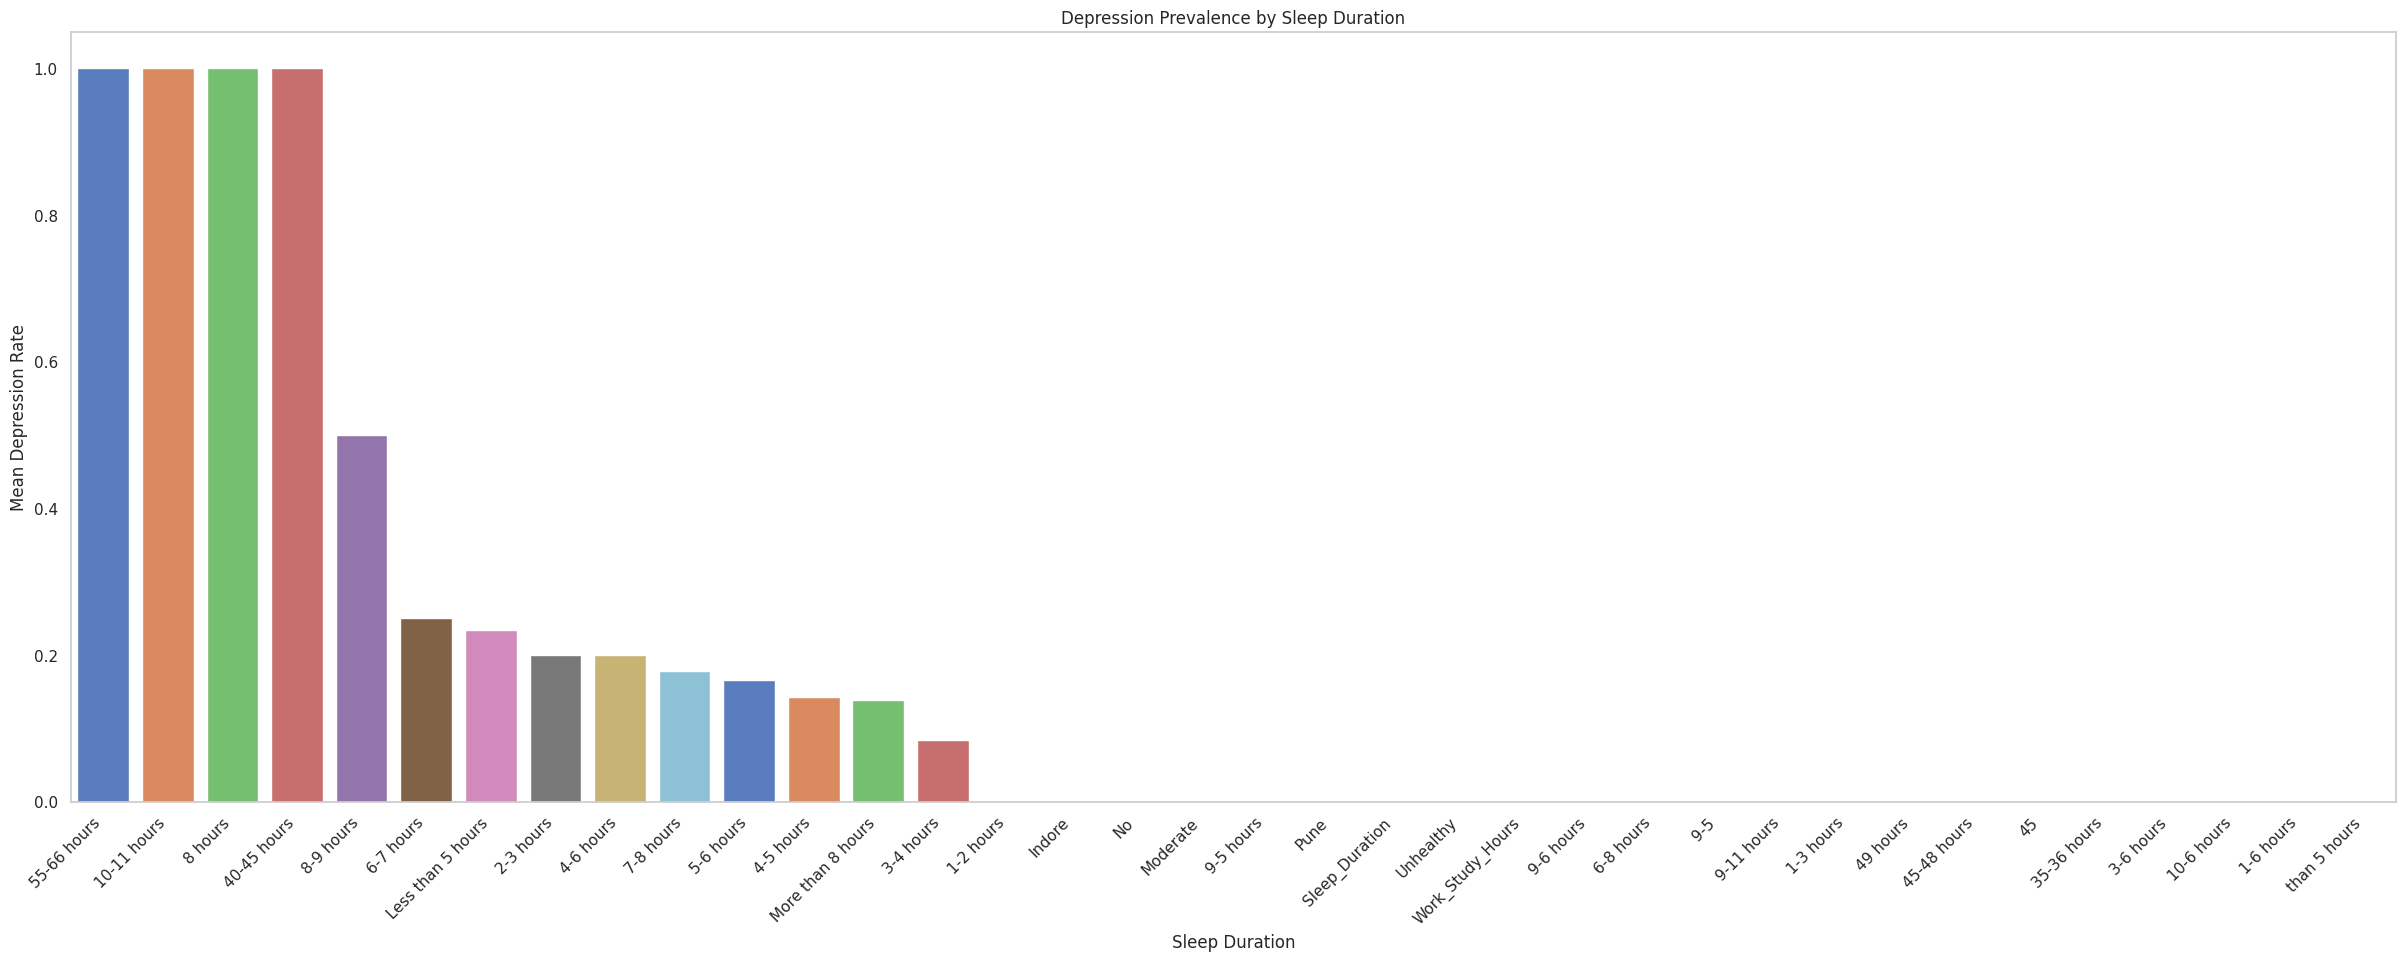

In [40]:
sleep_duration_depression = train_df.groupby('Sleep Duration')['Depression'].mean().sort_values(ascending=False)
# Visualize the prevalence of depression by profession
plt.figure(figsize=(30, 10))
sns.barplot(x=sleep_duration_depression.index, y=sleep_duration_depression.values, palette='muted')
plt.title("Depression Prevalence by Sleep Duration")
plt.xlabel("Sleep Duration")
plt.ylabel("Mean Depression Rate")
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

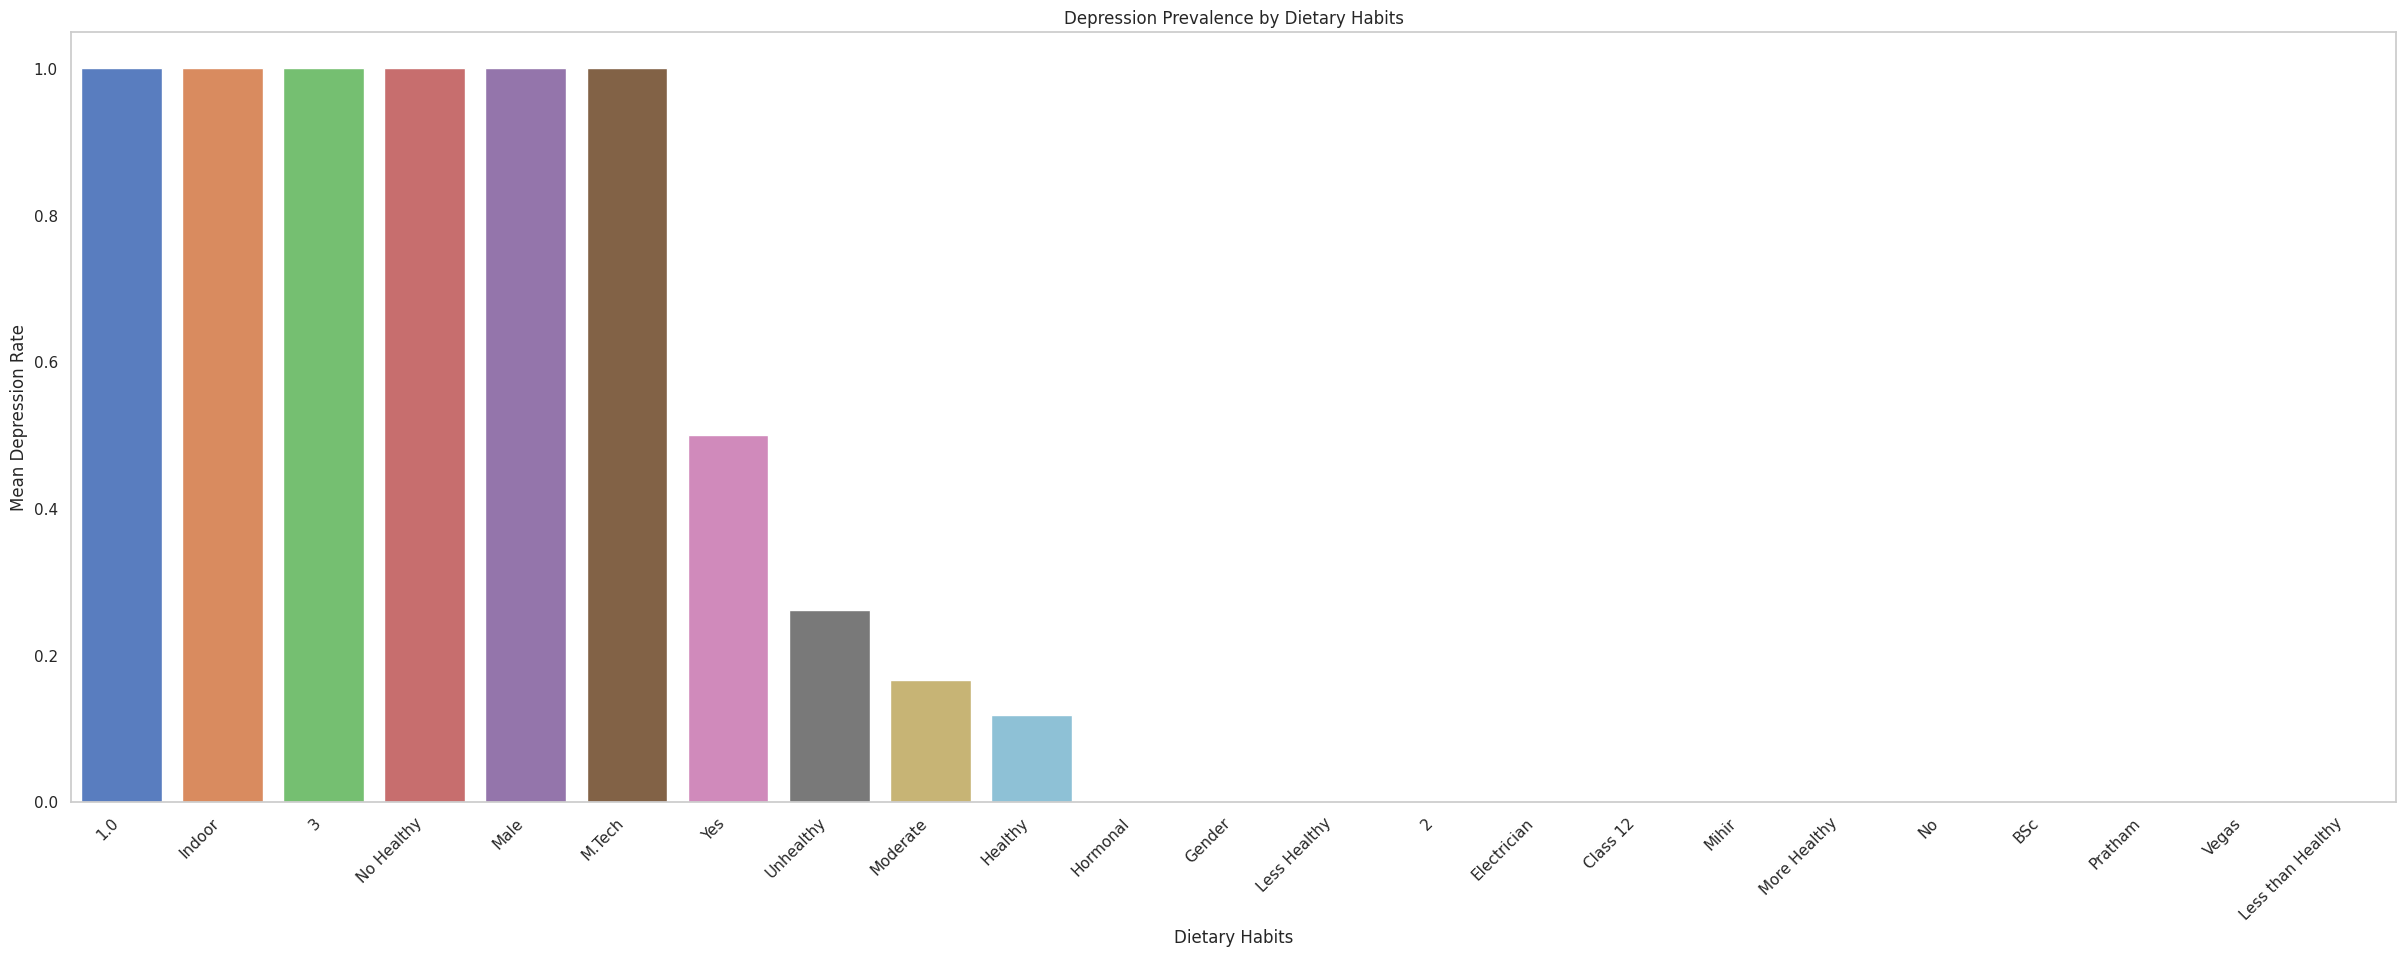

In [41]:
dietary_depression = train_df.groupby('Dietary Habits')['Depression'].mean().sort_values(ascending=False)
# Visualize the prevalence of depression by degree
plt.figure(figsize=(30, 10))
sns.barplot(x=dietary_depression.index, y=dietary_depression.values, palette='muted')
plt.title("Depression Prevalence by Dietary Habits")
plt.xlabel("Dietary Habits")
plt.ylabel("Mean Depression Rate")
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

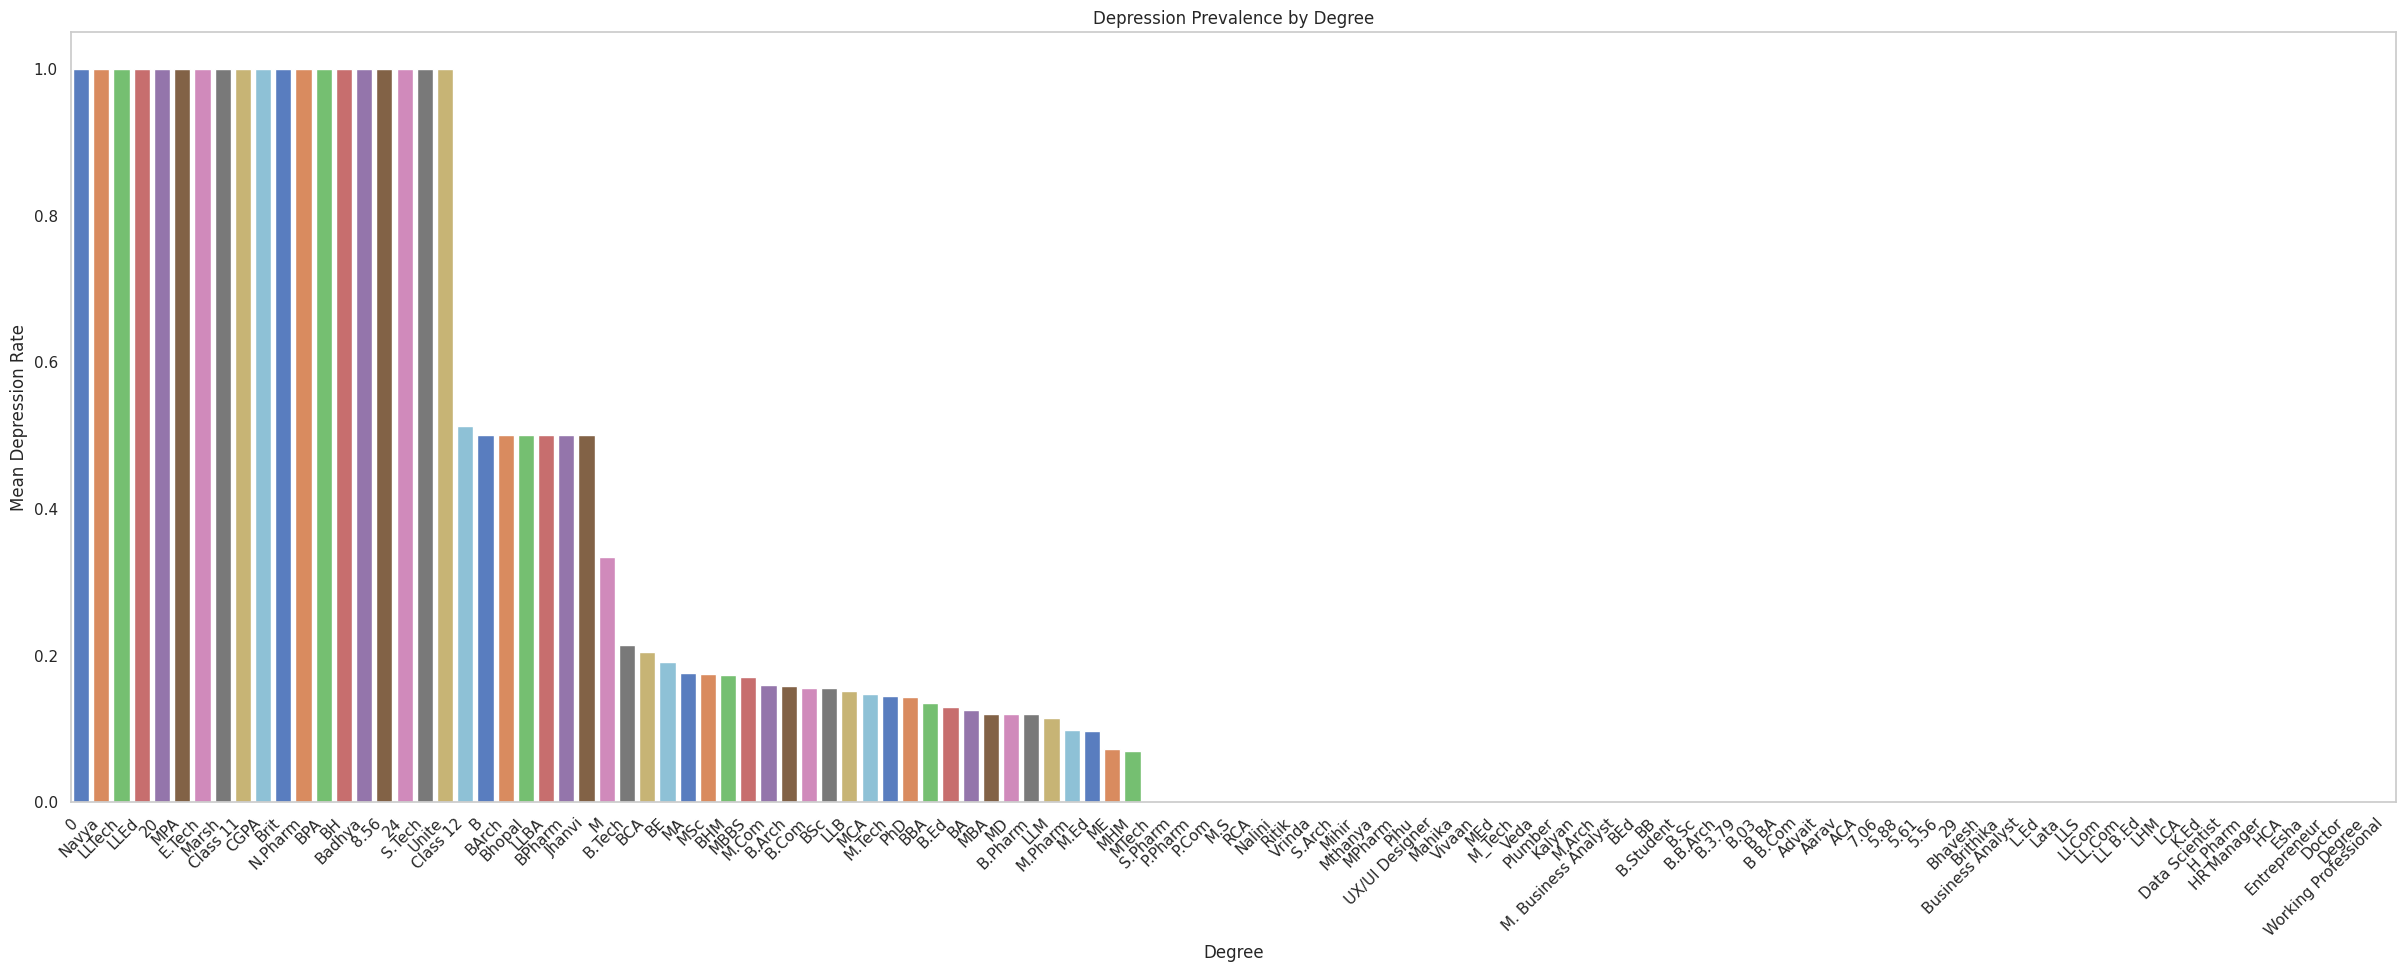

In [42]:
degree_depression = train_df.groupby('Degree')['Depression'].mean().sort_values(ascending=False)
# Visualize the prevalence of depression by degree
plt.figure(figsize=(30, 10))
sns.barplot(x=degree_depression.index, y=degree_depression.values, palette='muted')
plt.title("Depression Prevalence by Degree")
plt.xlabel("Degree")
plt.ylabel("Mean Depression Rate")
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

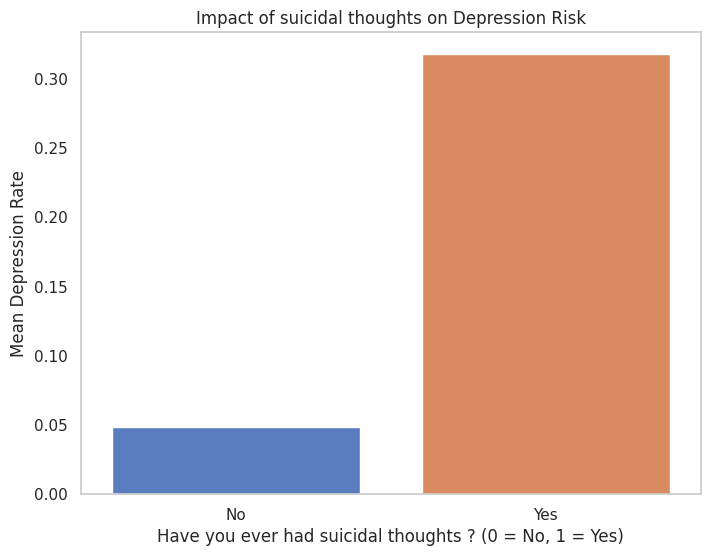

In [43]:
suicidal_thoughts = train_df.groupby('Have you ever had suicidal thoughts ?')['Depression'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=suicidal_thoughts.index, y=suicidal_thoughts.values, palette='muted')
plt.title("Impact of suicidal thoughts on Depression Risk")
plt.xlabel("Have you ever had suicidal thoughts ? (0 = No, 1 = Yes)")
plt.ylabel("Mean Depression Rate")
plt.grid(False)
plt.show()

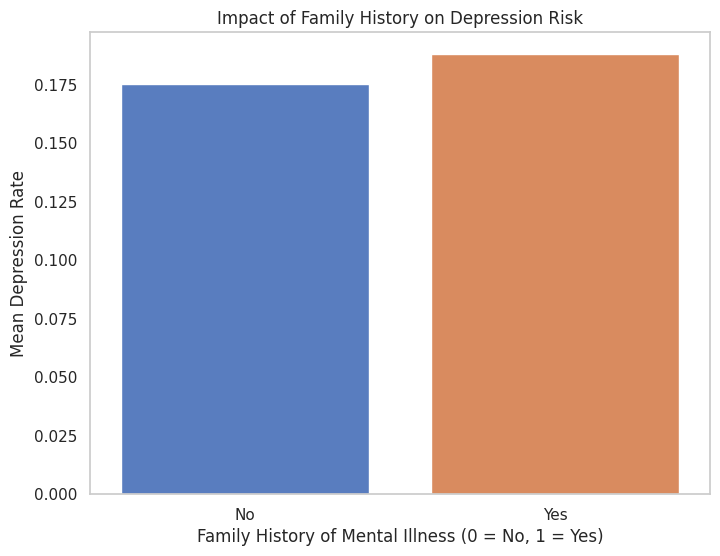

In [44]:
family_history_depression = train_df.groupby('Family History of Mental Illness')['Depression'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=family_history_depression.index, y=family_history_depression.values, palette='muted')
plt.title("Impact of Family History on Depression Risk")
plt.xlabel("Family History of Mental Illness (0 = No, 1 = Yes)")
plt.ylabel("Mean Depression Rate")
plt.grid(False)
plt.show()

---

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 4.1 - Outlier analysis</b></div>

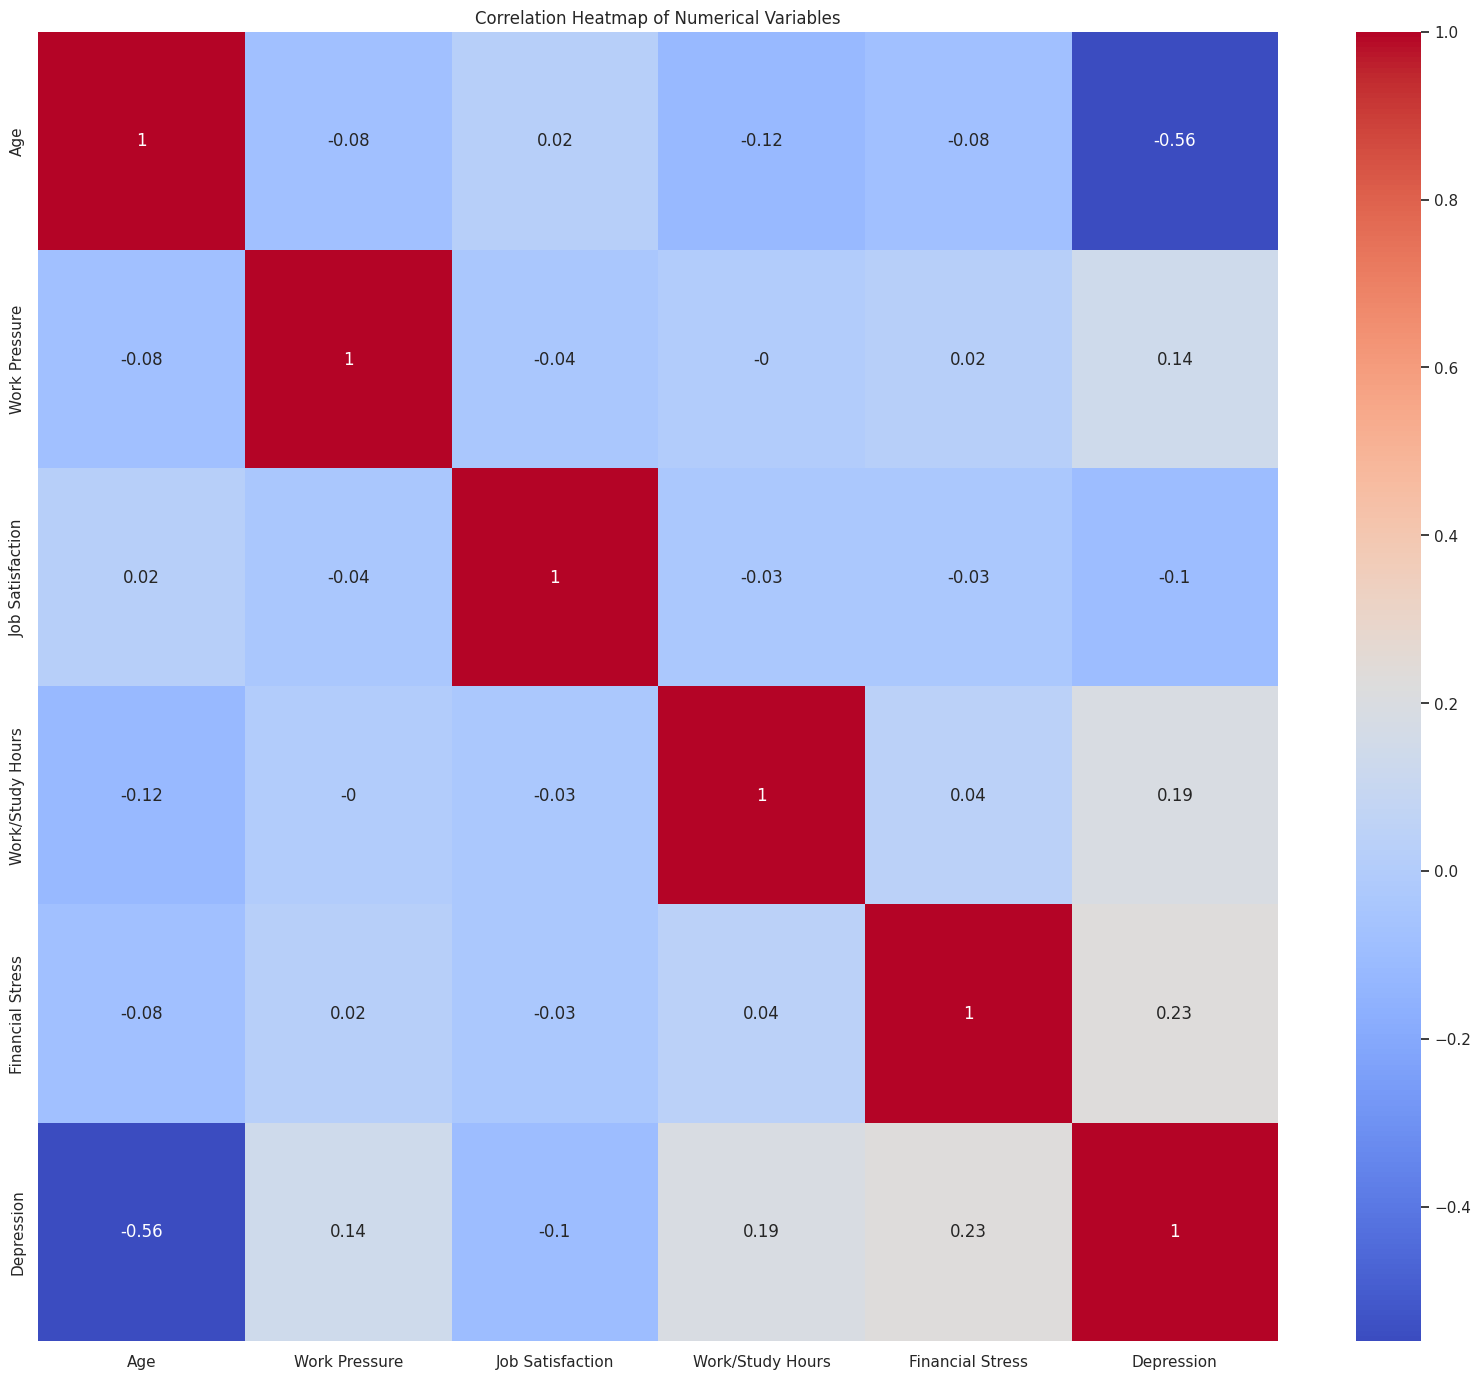

In [45]:
# Numerical
df_numerical = train_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numerical.corr(method='pearson')

plt.figure(figsize=(20, 17))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

In [46]:
# Select only numeric columns from the dataset
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Step 1: Select Numeric Columns Only
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate Correlation Matrix
correlation_matrix = numeric_df.corr()

# Step 3: Sort Correlations
correlation_with_depression = correlation_matrix['Depression'].sort_values(ascending=False)

# Display the correlations
print("Correlation of variables with Depression:")
print(correlation_with_depression)

Correlation of variables with Depression:
Depression          1.000000
Financial Stress    0.227227
Work/Study Hours    0.191746
Work Pressure       0.137988
Job Satisfaction   -0.103058
Age                -0.564671
Name: Depression, dtype: float64


Index(['Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')


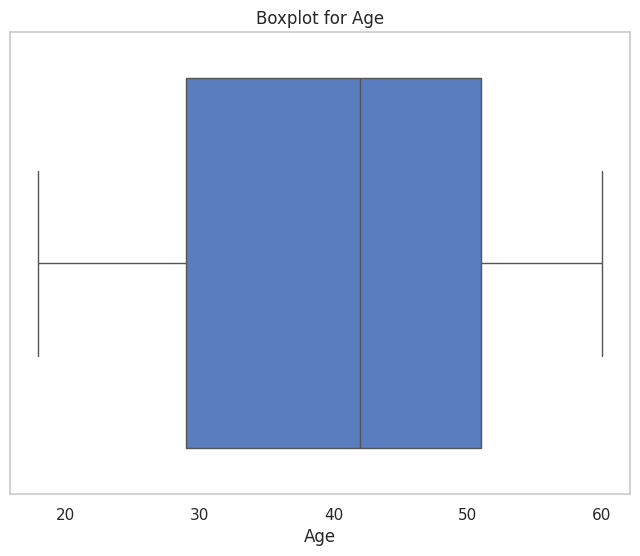

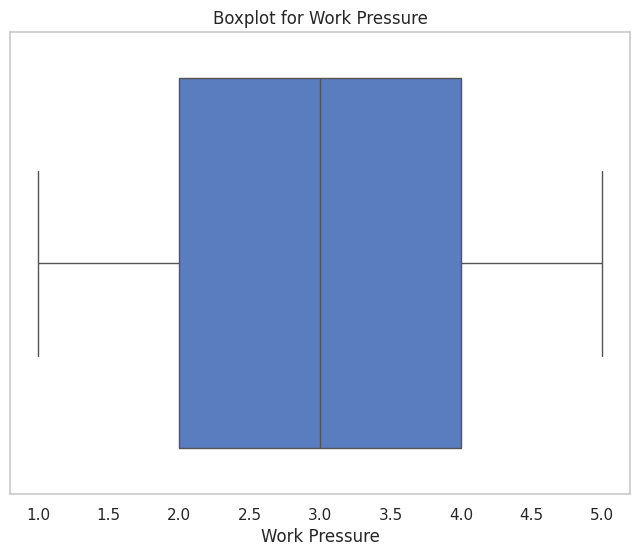

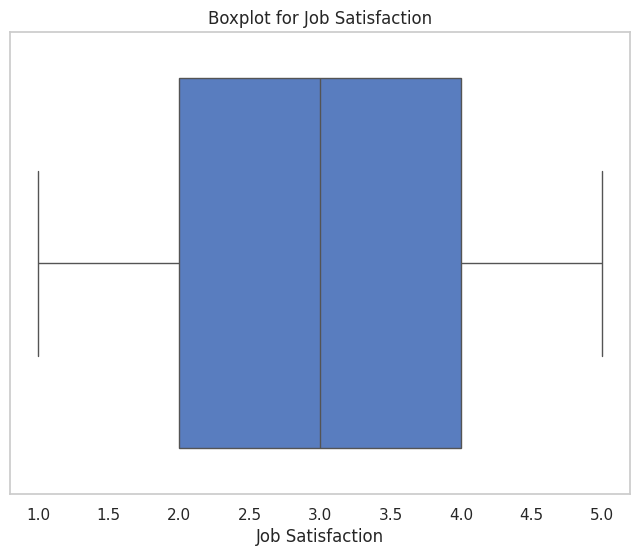

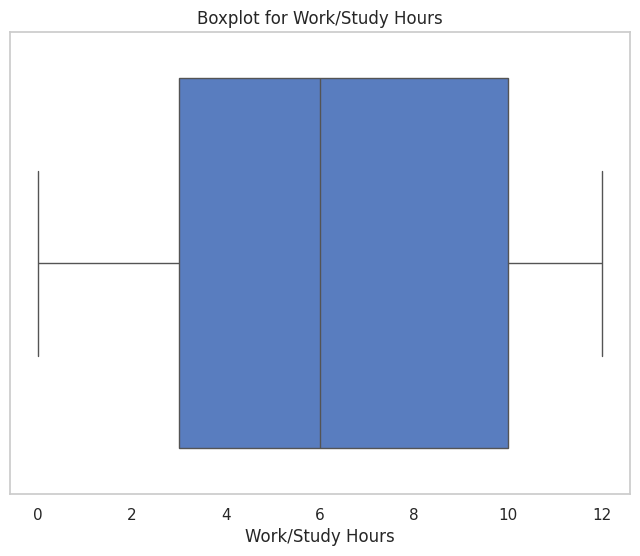

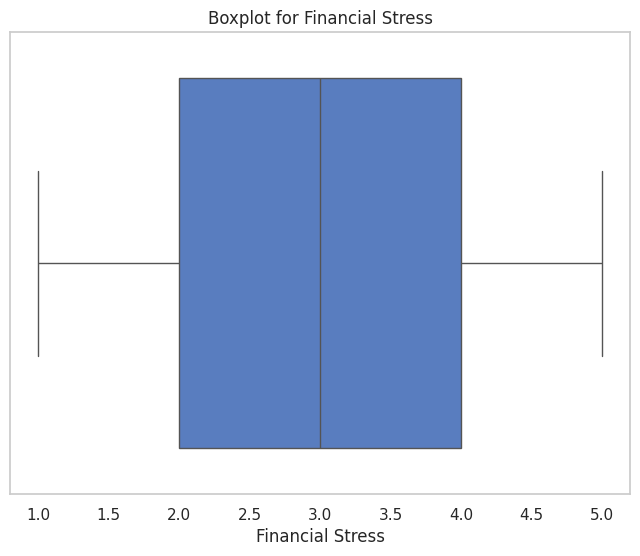

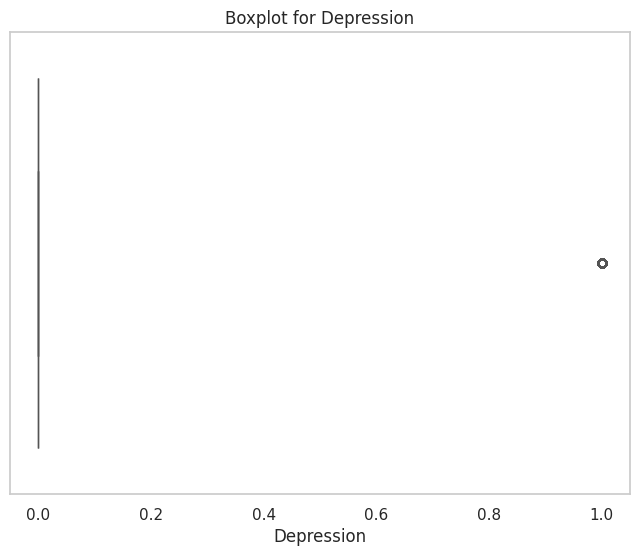

In [47]:
# Step 1: Visualize Data with Boxplot
numerical_features = train_df.select_dtypes('int64', 'float64').columns
print(numerical_features)

# Plot boxplot
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train_df[feature], palette='muted')
    plt.title(f"Boxplot for {feature}")
    plt.xlabel(feature)
    plt.grid(False)
    plt.show()

Age: 0 outliers detected.
Work Pressure: 0 outliers detected.
Job Satisfaction: 0 outliers detected.
Work/Study Hours: 0 outliers detected.
Financial Stress: 0 outliers detected.
Depression: 25567 outliers detected.


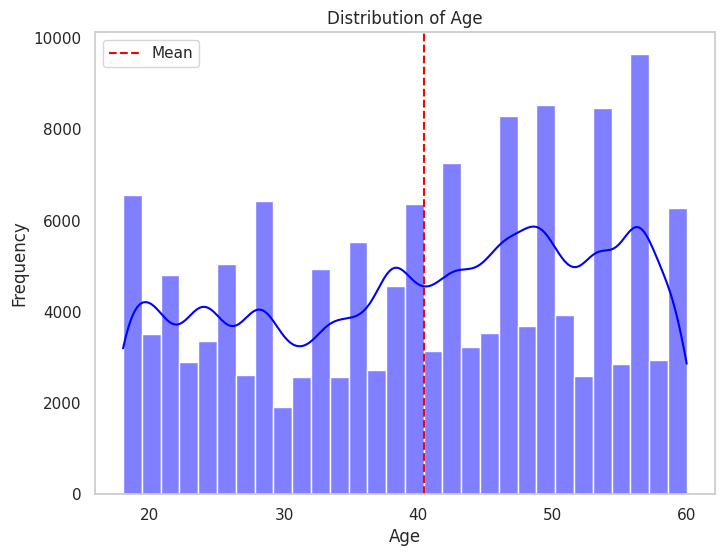

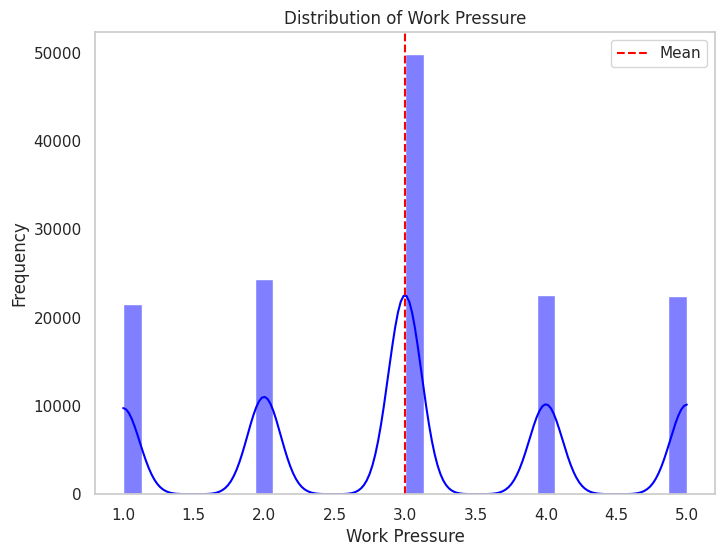

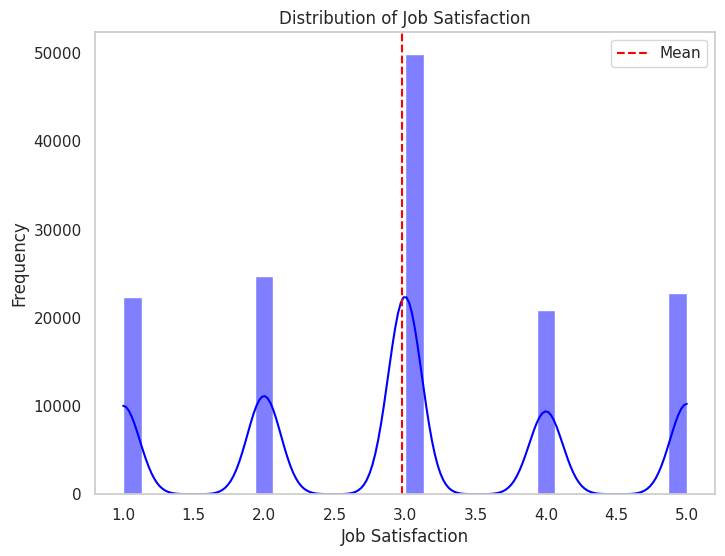

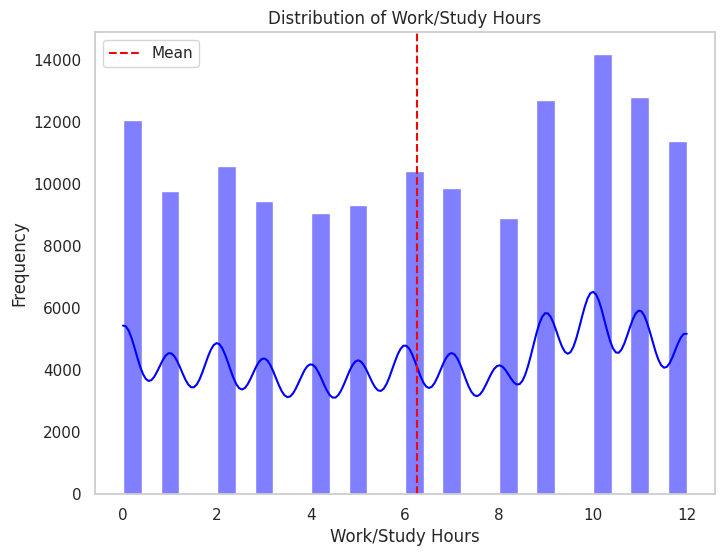

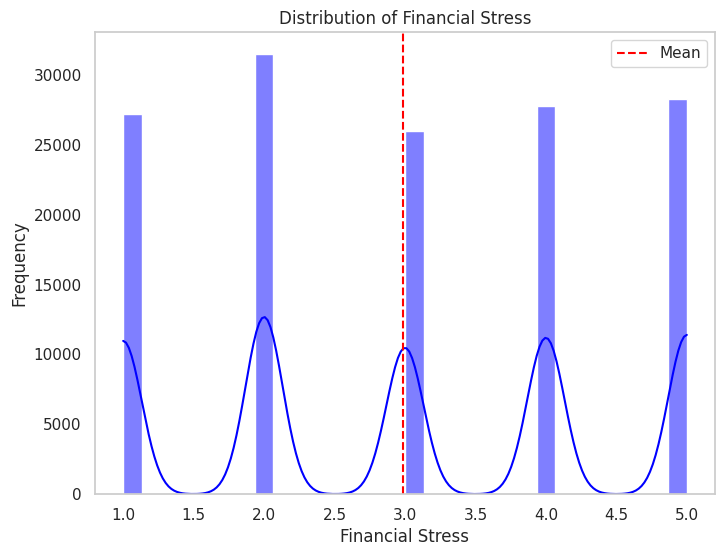

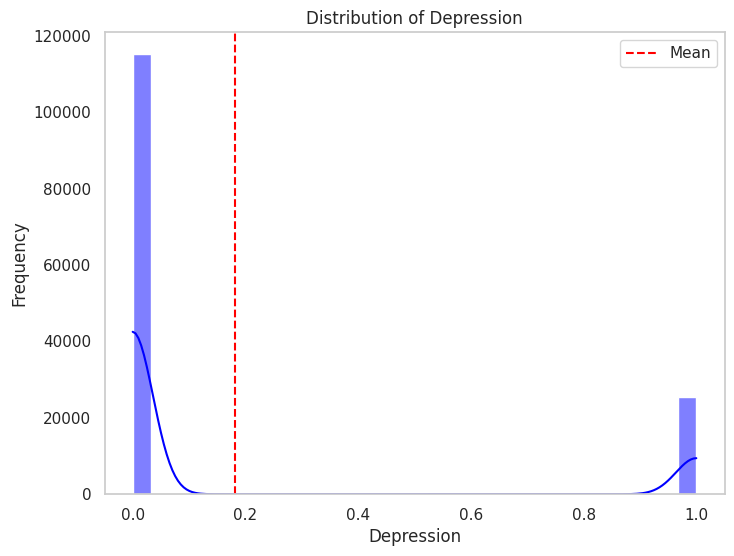

In [48]:
# Define a function for detecting outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                     # Interquartile range
    lower_bound = Q1 - 1.5 * IQR      # Lower bound
    upper_bound = Q3 + 1.5 * IQR      # Upper bound
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply the function to each numerical feature
for feature in numerical_features:
    outliers = detect_outliers_iqr(train_df, feature)
    print(f"{feature}: {len(outliers)} outliers detected.")

# Step 3: Visualize Outliers with Distributions
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.axvline(train_df[feature].mean(), color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid(False)
    plt.show()

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 5 - Pre Processing</b></div>

In [49]:
# import numpy as np

# # Replace 'Unknown' values with NaN
# train_df.replace('Unknown', np.nan, inplace=True)

# # Fill missing values with mode (for categorical columns) or mean (for numerical columns)
# for column in train_df.columns:
#     if train_df[column].dtype == 'object':

#         # Categorical columns
#         train_df[column].fillna(train_df[column].mode()[0], inplace=True)
#     else:

#         # Numerical columns
#         train_df[column].fillna(train_df[column].mean(), inplace=True)

# train_df

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 6 - Feature Engineering</b></div>

In [50]:
# Import necessary library
from sklearn.preprocessing import LabelEncoder

# List of categorical columns that need Label Encoding
categorical_columns = train_df.select_dtypes(include=['object']).columns

# Create encoders using LabelEncoder
encoders = {}

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    encoders[column] = LabelEncoder()
    train_df[column] = encoders[column].fit_transform(train_df[column])

# View the dataset after transformation
train_df.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49,50,1,10,5,2,29,7,33,0,1,2,0,0
1,1,26,93,1,55,4,3,27,20,63,1,7,3,0,1
2,1,33,97,0,59,3,3,15,7,21,1,3,1,0,1
3,1,22,64,1,55,5,1,27,15,28,1,10,1,1,1
4,0,30,37,1,9,1,1,15,20,28,1,9,4,1,0


In [51]:
# Check the encoded values for each categorical column
for column in categorical_columns:
    print(f"{column}: {encoders[column].classes_}")

Gender: ['Female' 'Male']
City: ['3.0' 'Aaradhya' 'Aditya' 'Agra' 'Ahmedabad' 'Aishwarya' 'Anvi' 'Armaan'
 'Atharv' 'Ayansh' 'Ayush' 'Bangalore' 'Bhavna' 'Bhopal' 'Chennai'
 'Chhavi' 'City' 'Delhi' 'Dhruv' 'Faridabad' 'Galesabad' 'Gaurav'
 'Ghaziabad' 'Gurgaon' 'Harsh' 'Harsha' 'Hyderabad' 'Indore' 'Ishanabad'
 'Ishkarsh' 'Ithal' 'Itheg' 'Ivaan' 'Jaipur' 'Jhanvi' 'Kagan' 'Kalyan'
 'Kanpur' 'Kashish' 'Kashk' 'Keshav' 'Khaziabad' 'Khushi' 'Kibara'
 'Kolkata' 'Krinda' 'Krishna' 'Less Delhi' 'Less than 5 Kalyan' 'Lucknow'
 'Ludhiana' 'M.Com' 'M.Tech' 'MCA' 'ME' 'MSc' 'Mahi' 'Malyansh' 'Meerut'
 'Mihir' 'Mira' 'Molkata' 'Moreadhyay' 'Morena' 'Mumbai' 'Nagpur' 'Nalini'
 'Nalyan' 'Nandini' 'Nashik' 'No' 'Parth' 'Patna' 'Plata' 'Pooja'
 'Pratyush' 'Pune' 'Raghavendra' 'Rajkot' 'Rashi' 'Researcher' 'Reyansh'
 'Saanvi' 'Shrey' 'Srinagar' 'Surat' 'Thane' 'Tolkata' 'Tushar' 'Unirar'
 'Vaanya' 'Vadodara' 'Vaishnavi' 'Varanasi' 'Vasai-Virar' 'Vidhi' 'Vidya'
 'Visakhapatnam']
Working Professional or 

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 7 - Target column division</b></div>

In [52]:
# Resources
X = train_df.drop(columns=['Depression'])

# Target variable
y = train_df['Depression']

In [53]:
# Visualizing data x
print(X.shape)
print(y.shape)

(140700, 14)
(140700,)


# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 8 - Train Test Split</b></div>

In [54]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing training data
print("Viewing rows and columns given by X_train", X_train.shape)
print("Viewing rows and columns given y_train", y_train.shape)
# Viewing test data
print("Viewing rows and columns given by X_test", X_test.shape)
print("Viewing rows and columns given y_test", y_test.shape)

Viewing rows and columns given by X_train (112560, 14)
Viewing rows and columns given y_train (112560,)
Viewing rows and columns given by X_test (28140, 14)
Viewing rows and columns given y_test (28140,)


# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 9 - Model Machine learning</b></div>

In [57]:
%%time

# Importing libraries for various classification models and performance evaluation
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# List of models to be evaluated
models = [

    # Naive Bayes model (good for small datasets, assumes independence between features)
    GaussianNB(),

    # Decision Tree model (simple and interpretable, prone to overfitting)
    DecisionTreeClassifier(random_state=42),

    # Random Forest (ensemble of decision trees, reduces overfitting and improves accuracy)
    RandomForestClassifier(n_estimators=100, random_state=42),

    # Logistic Regression (linear model, great for binary classification problems)
    LogisticRegression(random_state=50, max_iter=1000),

    # AdaBoost (boosting algorithm, combines weak learners to create a strong classifier)
    AdaBoostClassifier(random_state=45),

    # XGBoost (powerful gradient boosting algorithm, handles missing data well and has regularization)
    XGBClassifier(random_state=42),

    # LightGBM (another gradient boosting model optimized for speed and performance)
    LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1, verbose=50)
]

CPU times: user 21.3 ms, sys: 6.07 ms, total: 27.4 ms
Wall time: 45.8 ms


In [58]:
# Assuming you already have your training and evaluation loop as described
predictions = {}
scores = {}

for i, model in enumerate(models):

    # Train the model on the training dataset
    model.fit(X_train, y_train)

    # Calculate the training accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))

    # Calculate the testing accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Make predictions
    y_pred = model.predict(X_test)
    predictions[type(model).__name__] = y_pred

    # Calculate the accuracy of the predictions
    score = accuracy_score(y_test, y_pred)
    scores[type(model).__name__] = score

    # Print the model name and the accuracies on the training and testing datasets
    print("-----------------")
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")
    print()

# Print the model scores on the testing datasets
print("Model Scores on the testing datasets")
for model_name, score in scores.items():
    print()
    print(f"{model_name}: {score}")

-----------------
Model 1: GaussianNB
Training Accuracy: 0.8769278606965174
Testing Accuracy: 0.8803482587064677
-----------------

-----------------
Model 2: DecisionTreeClassifier
Training Accuracy: 0.9999466950959488
Testing Accuracy: 0.8878464818763326
-----------------

-----------------
Model 3: RandomForestClassifier
Training Accuracy: 0.9999200426439232
Testing Accuracy: 0.9272565742714997
-----------------

-----------------
Model 4: LogisticRegression
Training Accuracy: 0.9290600568585643
Testing Accuracy: 0.9271855010660981
-----------------

-----------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.9291577825159915
Testing Accuracy: 0.9292821606254442
-----------------

-----------------
Model 6: XGBClassifier
Training Accuracy: 0.9438788201847903
Testing Accuracy: 0.9288557213930348
-----------------

-----------------
Model 7: LGBMClassifier
Training Accuracy: 0.9323827292110874
Testing Accuracy: 0.9303837953091685
-----------------

Model Scores on the testing d

In [62]:
models[-1]

LGBMClassifier(bagging_fraction=0.9, bagging_freq=50, feature_fraction=0.9,
               learning_rate=0.05, verbose=50, verbosity=-1)

In [63]:
import joblib
# Save the encoders and best model
# Lưu mô hình
joblib.dump(models[-1], 'weights/best_model.joblib')

# Lưu tất cả các LabelEncoders
joblib.dump(encoders, 'encoders/label_encoders.joblib')

['encoders/label_encoders.joblib']

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 10 - Feature importances</b></div>

Training Random Forest...


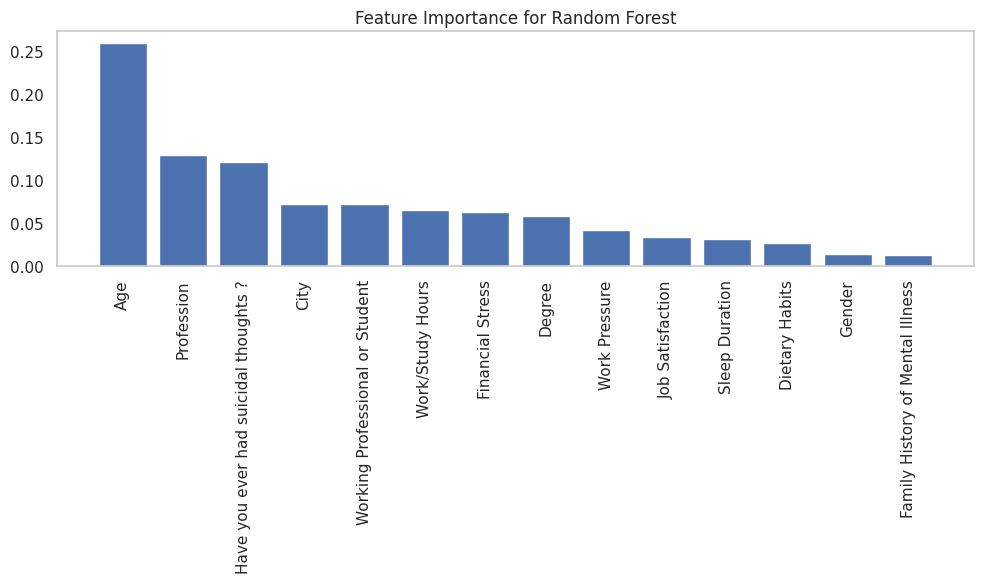

------------------------------------------------------------
Training Logistic Regression...


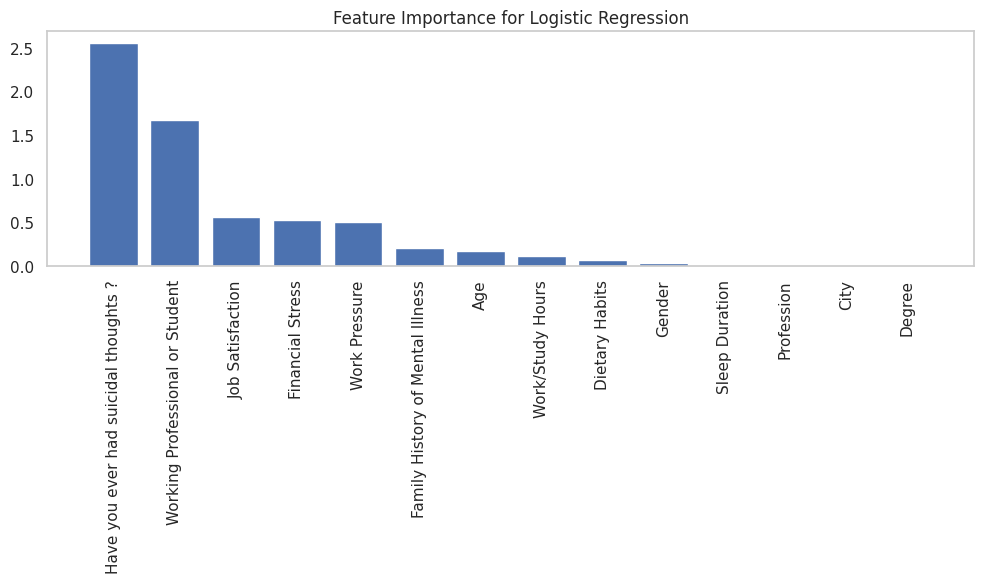

------------------------------------------------------------
Training Decision Tree...


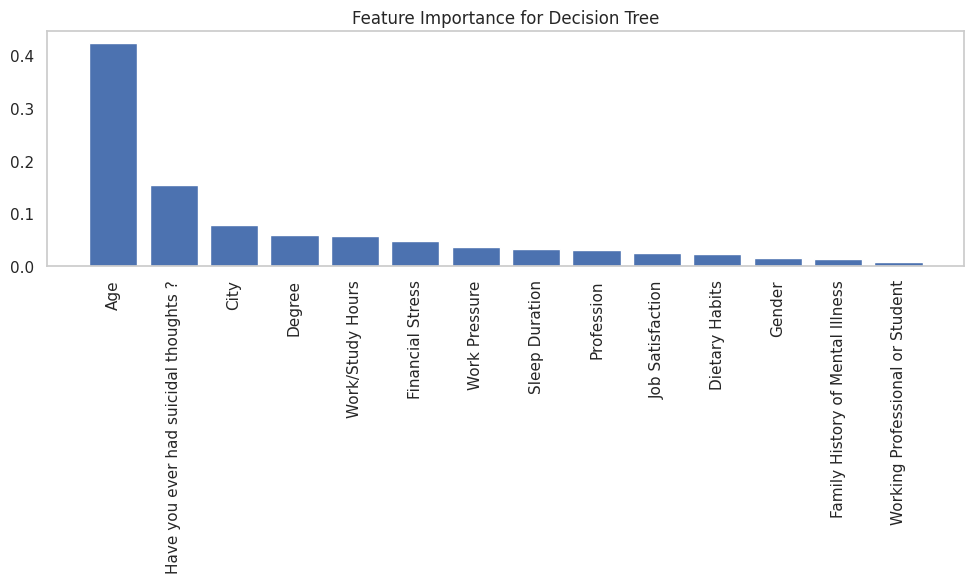

------------------------------------------------------------


In [64]:
models = {"Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier()}

# Now your loop will work correctly
# Get the feature names
feature_names = X_train.columns

# Iterate over the models
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Plot feature importance for models that support it
    if hasattr(model, 'feature_importances_'):

        # Tree-based models
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance for {model_name}")
        plt.bar(range(X_train.shape[1]), importance[indices], align="center")
        plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.grid(False)
        plt.show()

    elif model_name == "Logistic Regression":
        # For Logistic Regression, use the coefficients
        importance = np.abs(model.coef_[0])

        # Absolute value of the coefficients
        indices = np.argsort(importance)[::-1]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance for {model_name}")
        plt.bar(range(X_train.shape[1]), importance[indices], align="center")
        plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.grid(False)
        plt.show()
    else:
        print(f"Feature importance not available for {model_name}")
    print("-" * 60)

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 11 - Metrics and evaluations</b></div>

Training Naive Bayes...


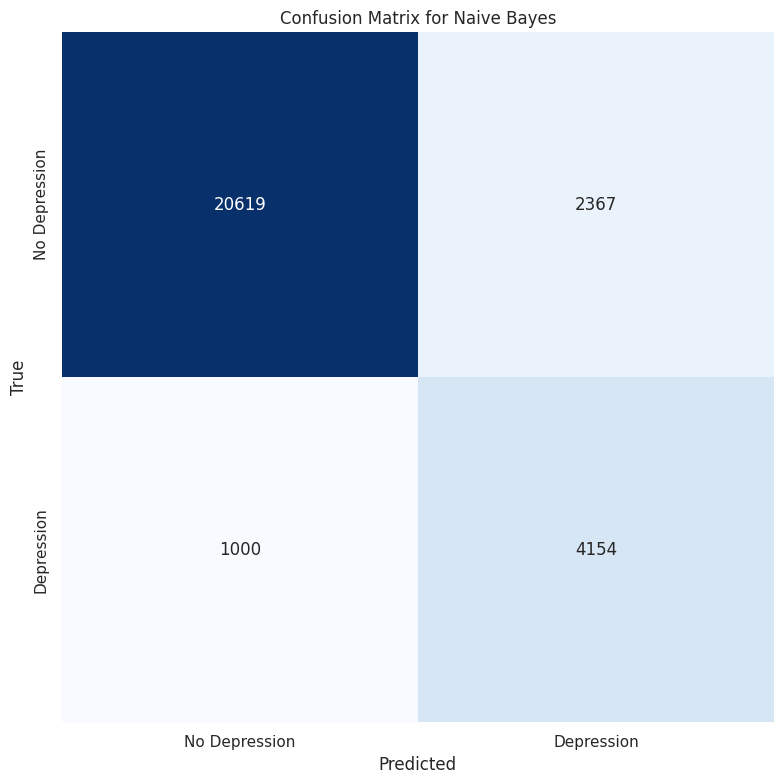

------------------------------------------------------------
Training Decision Tree...


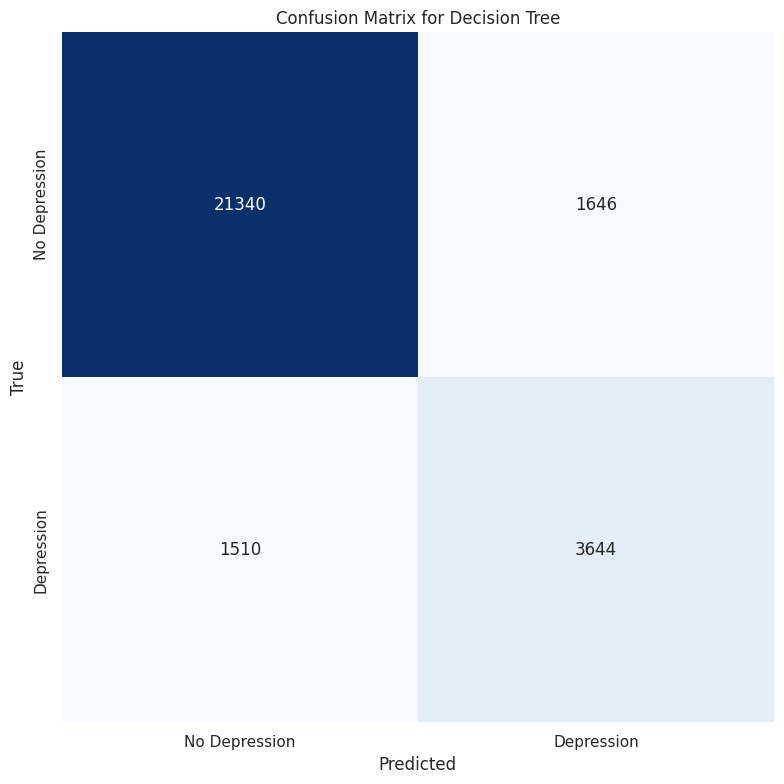

------------------------------------------------------------
Training Random Forest...


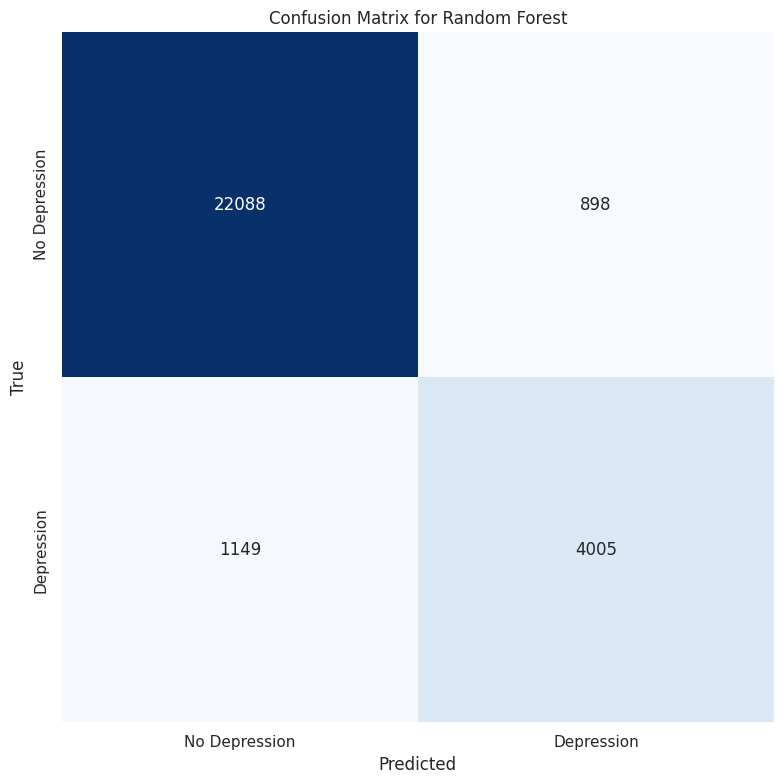

------------------------------------------------------------
Training Logistic Regression...


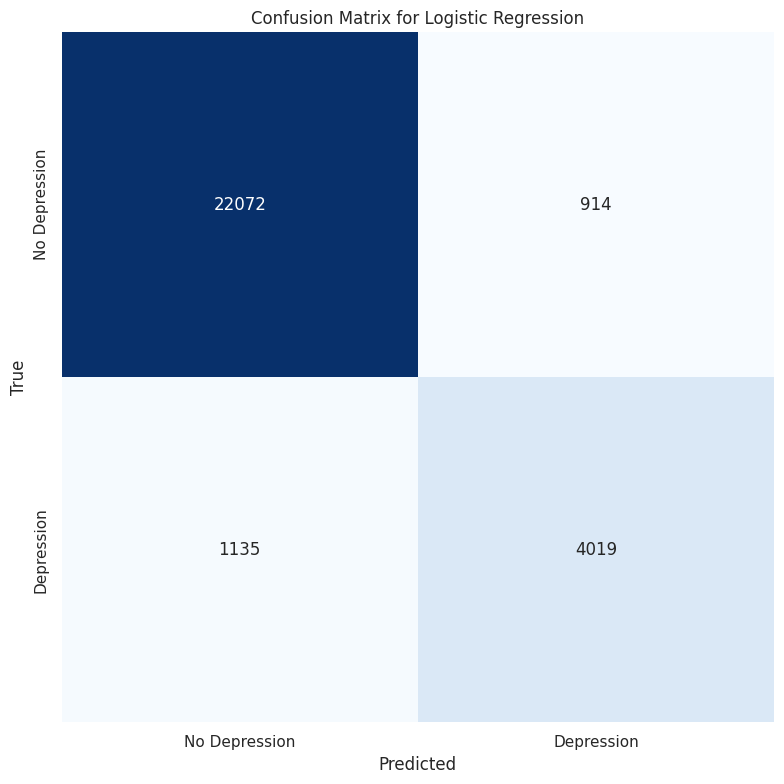

------------------------------------------------------------
Training AdaBoost...


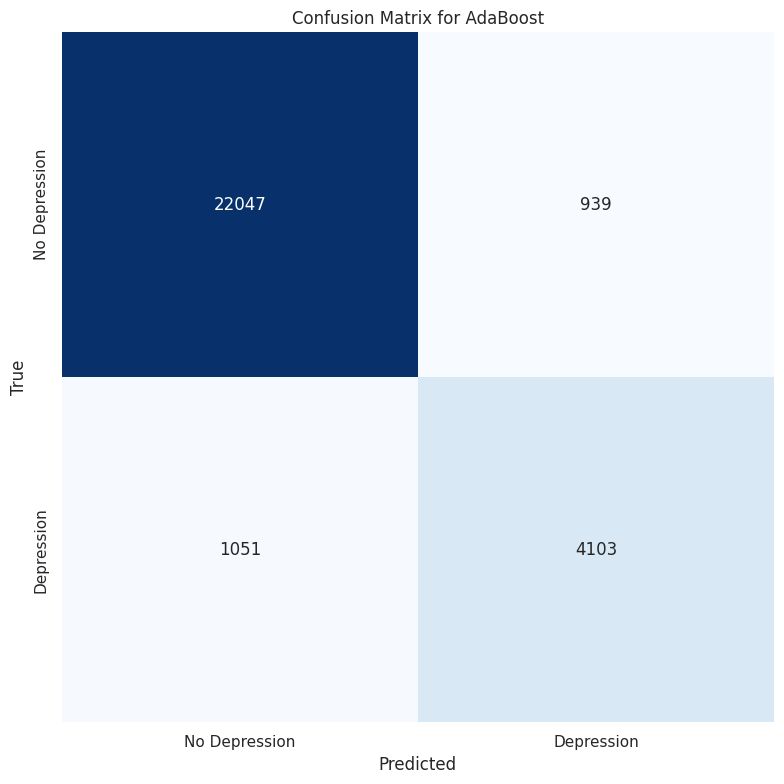

------------------------------------------------------------
Training XGBoost...


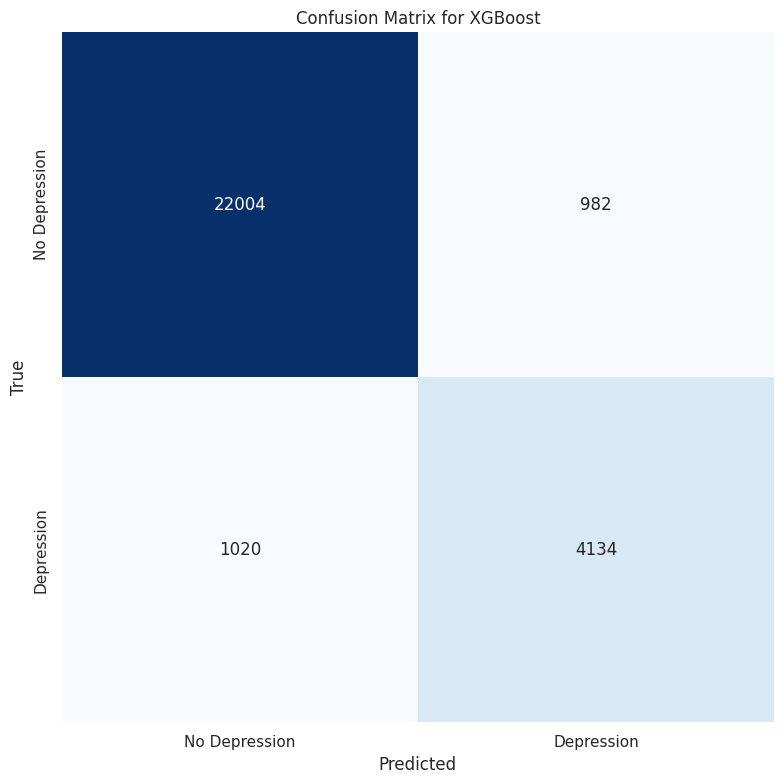

------------------------------------------------------------
Training LightGBM...


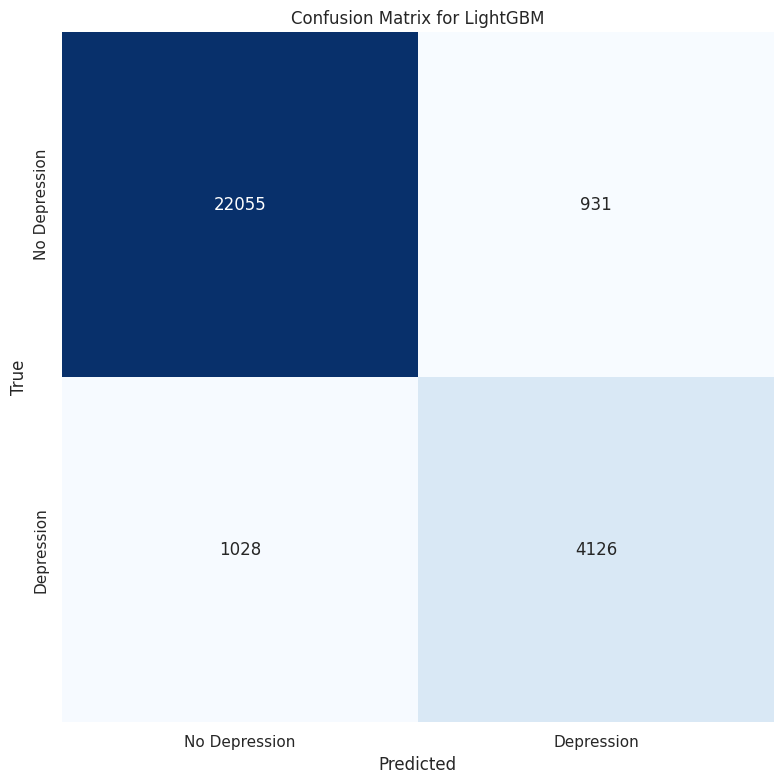

------------------------------------------------------------


In [65]:
from sklearn.metrics import confusion_matrix

# Define the models in a dictionary
models = {"Naive Bayes": GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
          "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
          "AdaBoost": AdaBoostClassifier(random_state=45),
          "XGBoost": XGBClassifier(random_state=42),
          "LightGBM": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1)
         }

# Define the class labels you want
class_labels = ["No Depression", "Depression"]

# Iterate over the models and plot the confusion matrix for each
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model on the training dataset
    model.fit(X_train, y_train)

    # Make predictions on the test dataset
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix with labels
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    print("-" * 60)

Training Naive Bayes...


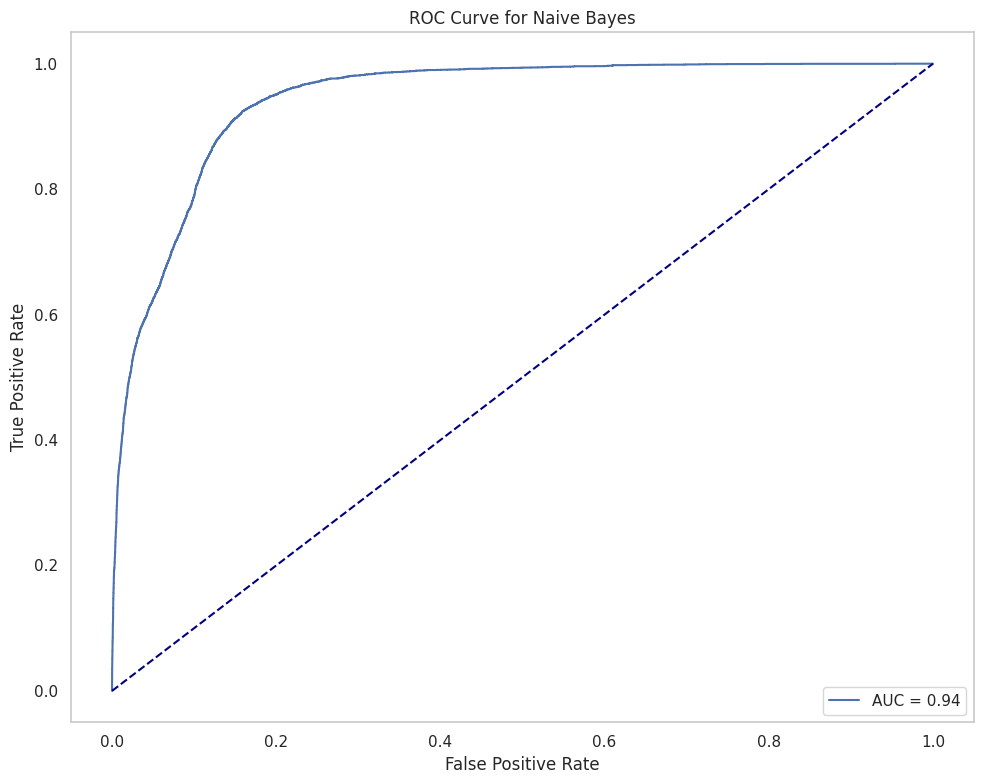

Training Decision Tree...


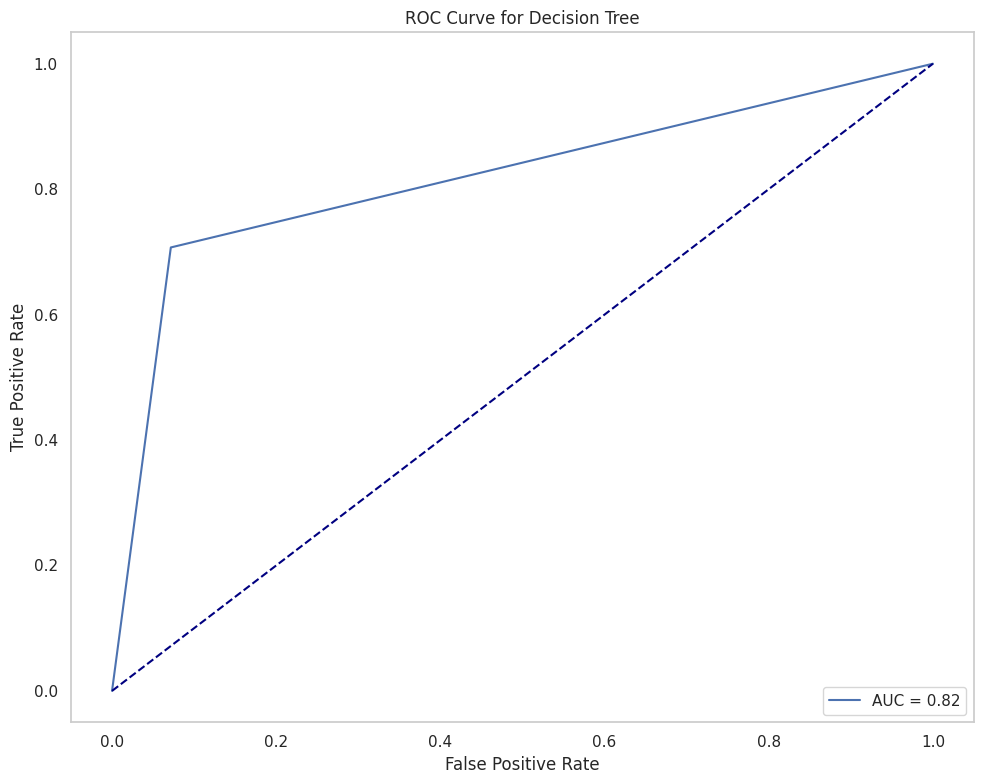

Training Random Forest...


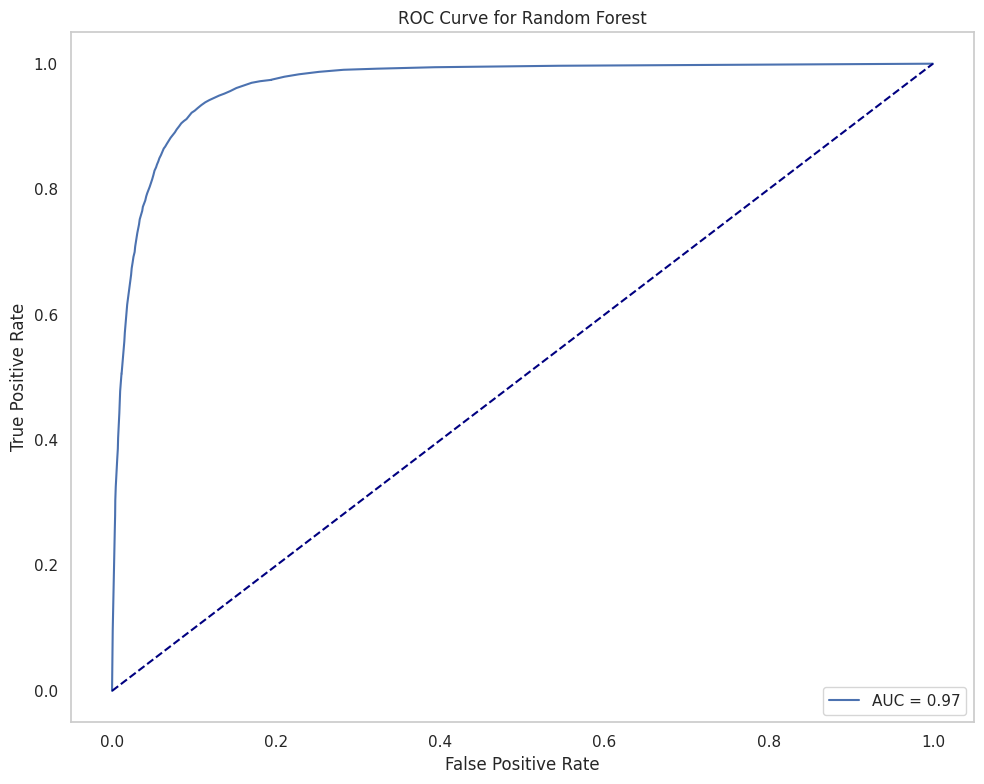

Training Logistic Regression...


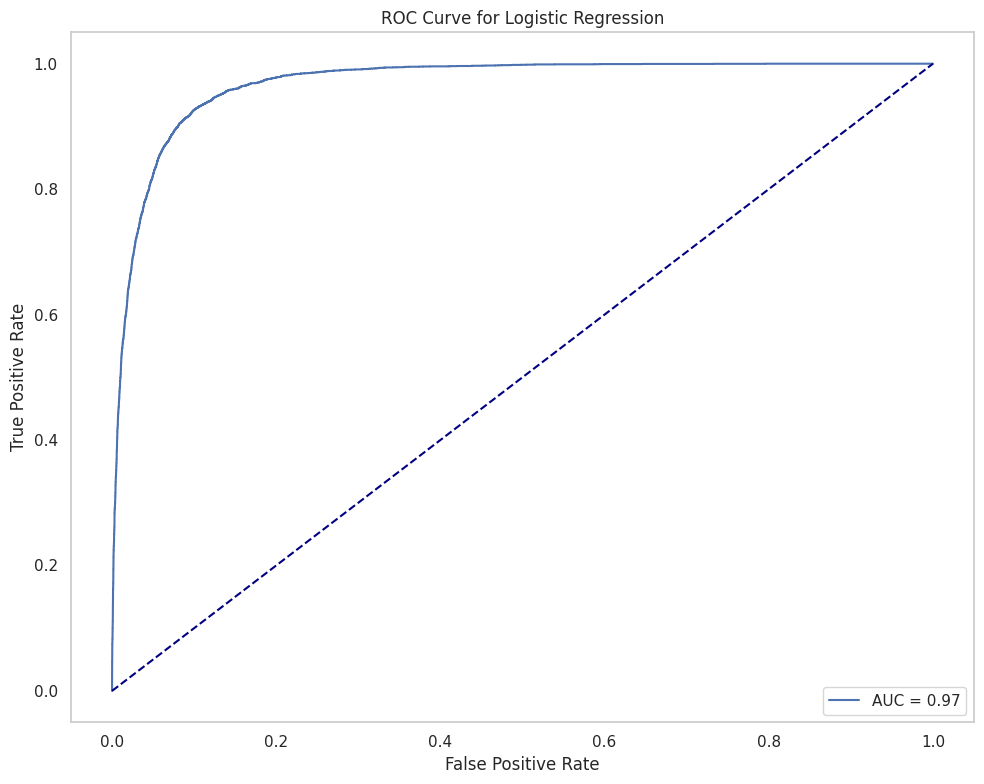

Training AdaBoost...


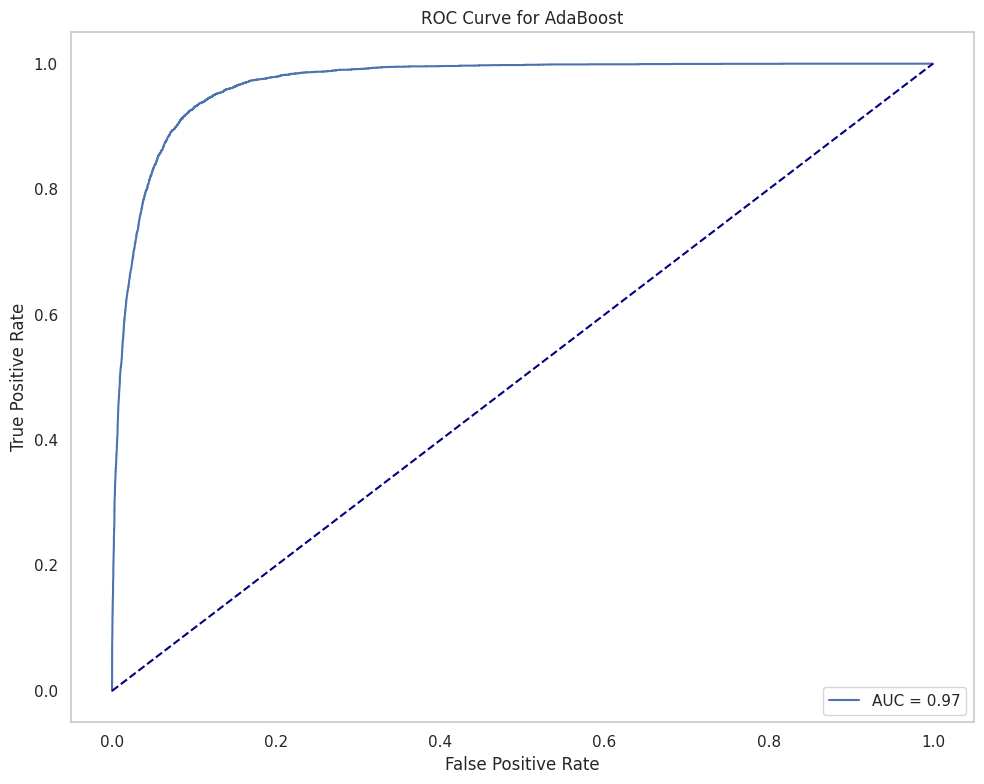

Training XGBoost...


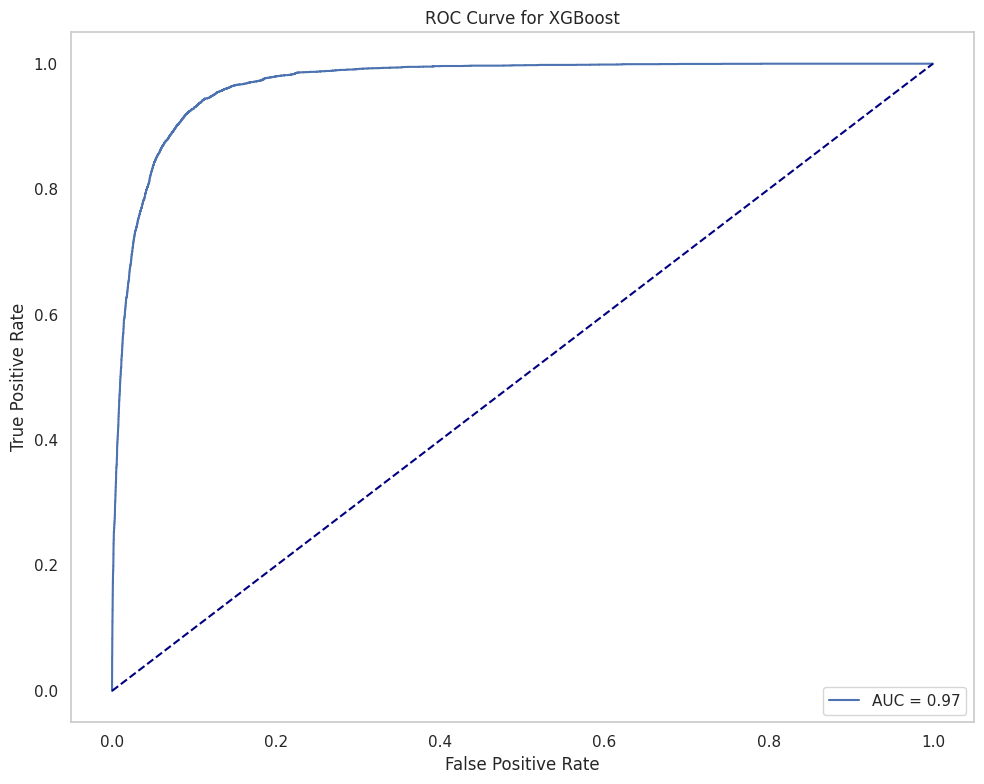

Training LightGBM...


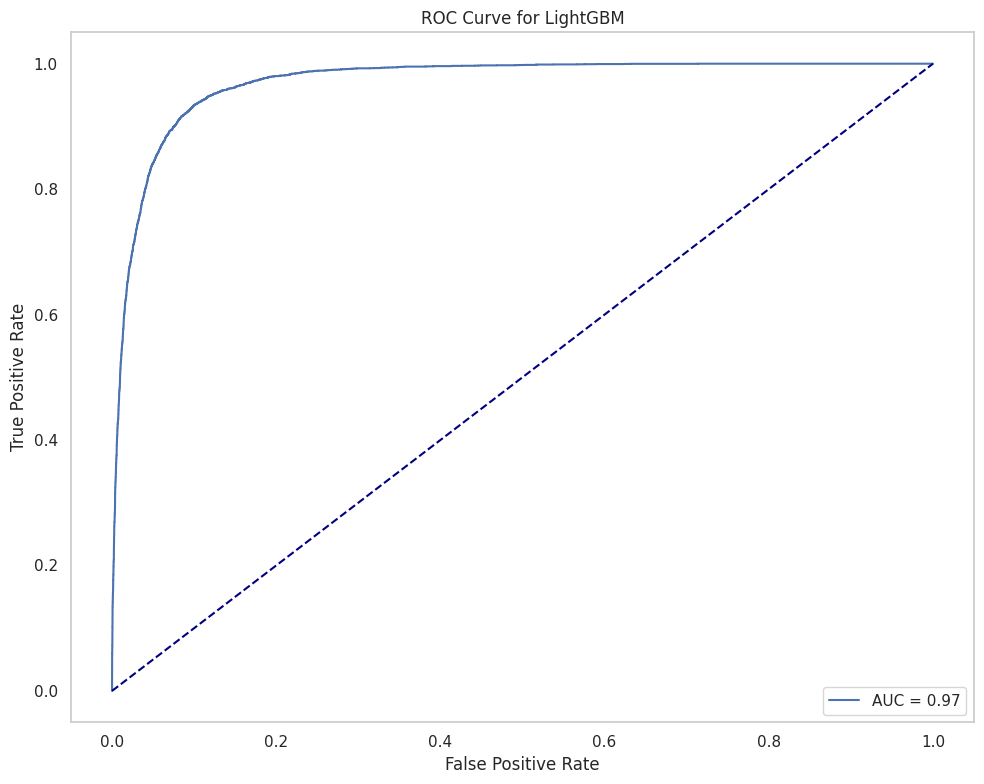

In [66]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay

# Define the models in a dictionary
models = {"Naive Bayes": GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
          "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
          "AdaBoost": AdaBoostClassifier(random_state=45),
          "XGBoost": XGBClassifier(random_state=42),
          "LightGBM": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9,
                                     learning_rate=0.05, feature_fraction=0.9,
                                     bagging_freq=50,
                                     verbosity=-1)}

# Check if the task is binary or multi-class
is_binary_classification = len(np.unique(y_train)) == 2

# Binarize the target for the ROC curve (One-vs-Rest) if multi-class
if not is_binary_classification:
    classes = np.unique(y_train)
    y_test_bin = label_binarize(y_test, classes=classes)
    y_train_bin = label_binarize(y_train, classes=classes)

# Iterate over the models and plot the ROC curve for each one
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Use One-vs-Rest strategy for multi-class classification
    classifier = OneVsRestClassifier(model)
    classifier.fit(X_train, y_train)

    # Predict the probabilities for the test data
    y_prob = classifier.predict_proba(X_test)

    # Check for NaN values in the predictions
    if np.isnan(y_prob).sum() > 0:
        print(f"There are NaN values in the predictions for model {model_name}. Skipping this model.")
        continue

    # Plot the ROC curve
    plt.figure(figsize=(10, 8))

    if is_binary_classification:
        # Binary classification: single ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")

    else:
        # Multi-class classification: ROC curve for each class
        for i in range(len(classes)):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

    # Finalize the ROC plot
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for "random guessing"
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

In [67]:
from sklearn.metrics import classification_report

# Definir os nomes dos rótulos
target_names = ["No Depression", "Depression"]

# Iterate over the models and compute classification reports
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute and display the classification report
    print(f"Classification Report for {model_name}:")
    print()
    report = classification_report(y_test, y_pred, target_names=target_names)
    print(report)
    print("-" * 60)

Training Naive Bayes...
Classification Report for Naive Bayes:

               precision    recall  f1-score   support

No Depression       0.95      0.90      0.92     22986
   Depression       0.64      0.81      0.71      5154

     accuracy                           0.88     28140
    macro avg       0.80      0.85      0.82     28140
 weighted avg       0.90      0.88      0.89     28140

------------------------------------------------------------
Training Decision Tree...
Classification Report for Decision Tree:

               precision    recall  f1-score   support

No Depression       0.93      0.93      0.93     22986
   Depression       0.69      0.71      0.70      5154

     accuracy                           0.89     28140
    macro avg       0.81      0.82      0.81     28140
 weighted avg       0.89      0.89      0.89     28140

------------------------------------------------------------
Training Random Forest...
Classification Report for Random Forest:

            

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 13 - AUC-ROC Metric with F1-Score with Threshold</b></div>

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.preprocessing import label_binarize

# Check if the problem is binary or multi-class
is_binary_classification = len(np.unique(y_train)) == 2

# Binarize the output for multiclass ROC curve (One-vs-Rest) if multi-class
if not is_binary_classification:
    classes = np.unique(y_train)  # Unique classes
    y_test_bin = label_binarize(y_test, classes=classes)
else:
    y_test_bin = y_test  # For binary classification, no need to binarize

# Initialize an empty list to store metrics
metrics_list = []

# Set a custom threshold
threshold = 0.6

# Iterate over the models
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        # For models like SVC that do not have predict_proba by default, use decision_function
        y_prob = model.decision_function(X_test)
        if is_binary_classification:
            # Adjust for binary case: convert decision scores to probabilities
            y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())
            y_prob = np.column_stack([1 - y_prob, y_prob])  # Convert to 2D array for binary

    # Calculate AUC-ROC for multiclass or binary
    if is_binary_classification:
        auc_roc = roc_auc_score(y_test, y_prob[:, 1])  # Use 1D array for binary
    else:
        auc_roc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='weighted')

    # Apply threshold to calculate F1-Score with custom threshold
    if is_binary_classification:
        # For binary classification
        y_pred_threshold = (y_prob[:, 1] >= threshold).astype(int)
        f1_with_threshold = f1_score(y_test, y_pred_threshold, average='binary')
    else:
        # For multi-class classification
        y_pred_threshold = (y_prob >= threshold).astype(int)
        f1_with_threshold = f1_score(y_test_bin, y_pred_threshold, average='weighted')

    # Append metrics for this model
    metrics_list.append({'Model': model_name,
                         'AUC-ROC': auc_roc,
                         'F1-Score with Threshold': f1_with_threshold})

# Convert metrics list to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Find the best model based on AUC-ROC
best_model_idx = metrics_df['AUC-ROC'].idxmax()

# Function to highlight the best model row in yellow
def highlight_best(s):
    return ['background-color: yellow' if s.name == best_model_idx else '' for _ in s]

# Apply the highlight function to the DataFrame
styled_df = metrics_df.style.apply(highlight_best, axis=1)
styled_df

Training Naive Bayes...
Training Decision Tree...
Training Random Forest...
Training Logistic Regression...
Training AdaBoost...
Training XGBoost...
Training LightGBM...


,Model,AUC-ROC,F1-Score with Threshold
0,Naive Bayes,0.943326,0.704299
1,Decision Tree,0.817707,0.697817
2,Random Forest,0.967375,0.774982
3,Logistic Regression,0.969032,0.779126
4,AdaBoost,0.970133,0.000000
5,XGBoost,0.970134,0.794139
6,LightGBM,0.970895,0.789027


# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 14 - Metric Accuracy</b></div>

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score

# Lista para armazenar métricas
metrics_list = []

# Iterate over the models and compute metrics
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)

    # Compute F1-Score
    f1 = f1_score(y_test, y_pred, average='binary')

    # Compute AUC-ROC Score (only for models that support predict_proba)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc_roc = roc_auc_score(y_test, y_prob)
    else:
        auc_roc = "N/A"  # Not applicable for models without predict_proba

    # Append metrics for this model
    metrics_list.append({'Model': model_name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    })

# Convert metrics list to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Highlight the best model based on Accuracy
best_model_idx = metrics_df['Accuracy'].idxmax()

# Function to highlight the best model row in yellow
def highlight_best(s):
    return ['background-color: yellow' if s.name == best_model_idx else '' for _ in s]

# Apply the highlight function to the DataFrame
styled_df = metrics_df.style.apply(highlight_best, axis=1)

# Display the styled DataFrame
styled_df

Training Naive Bayes...
Training Decision Tree...
Training Random Forest...
Training Logistic Regression...
Training AdaBoost...
Training XGBoost...
Training LightGBM...


,Model,Accuracy,F1-Score,AUC-ROC
0,Naive Bayes,0.880348,0.711606,0.943326
1,Decision Tree,0.887846,0.697817,0.817707
2,Random Forest,0.927257,0.796460,0.967375
3,Logistic Regression,0.927186,0.796867,0.969032
4,AdaBoost,0.929282,0.804825,0.970133
5,XGBoost,0.928856,0.805063,0.970134
6,LightGBM,0.930384,0.808148,0.970895


# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Part 15 - Neural Network (MLP)</b></div>

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112560, 14)
(112560,)
(28140, 14)
(28140,)


In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

X_train_scaled = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(standard_scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_scaled.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0.902328,1.178108,-1.375546,0.497806,0.788150,-1.587678,1.596884,1.137500,1.121159,-1.104321,-0.989817,-0.584280,-0.700416,1.004684
1,0.902328,1.097374,1.127883,0.497806,0.788150,1.588101,0.807239,0.781732,-1.344728,0.892983,-0.989817,1.231917,0.716975,1.004684
2,0.902328,0.612970,-0.107142,0.497806,0.788150,0.794156,0.017594,1.137500,0.172741,1.040931,-0.989817,-0.843737,-1.409112,1.004684
3,0.902328,-1.324647,0.426923,0.497806,0.788150,-1.587678,-1.561695,-0.641337,1.121159,-1.215282,1.010287,0.453547,1.425671,-0.995338
4,0.902328,-0.194371,0.193270,0.497806,0.992171,0.794156,1.596884,-1.352872,0.172741,-0.179643,-0.989817,-1.622107,-0.700416,-0.995338


In [ ]:
X_test_scaled.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,-1.108244,0.855172,0.660577,0.497806,0.788150,0.000212,1.596884,1.137500,0.172741,-1.104321,-0.989817,1.231917,-0.700416,1.004684
1,-1.108244,-1.647583,-1.642578,0.497806,0.992171,-1.587678,0.807239,0.781732,0.172741,-0.179643,-0.989817,-1.622107,1.425671,1.004684
2,-1.108244,-1.566849,-1.609199,-2.008816,0.992171,0.000212,0.017594,-1.352872,-1.344728,1.077918,1.010287,1.491373,-0.700416,1.004684
3,0.902328,-0.355839,-0.841481,0.497806,0.788150,1.588101,-0.772050,0.781732,0.172741,1.151892,-0.989817,-1.362650,-1.409112,-0.995338
4,0.902328,1.581778,0.393544,0.497806,-0.537982,-0.793733,-0.772050,-1.352872,0.172741,-0.808424,-0.989817,-0.065367,-0.700416,-0.995338


In [ ]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(112560, 14)
(112560,)
(28140, 14)
(28140,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Create the model
def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.3),  # Avoid overfitting
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Binary output
    ])
    return model

# Instantiate the model
input_dim = X_train_scaled.shape[1]
model = create_model(input_dim)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train_scaled,
                    y_train,
                    validation_split=0.2,  # Use 20% of the training data for validation
                    epochs=30,  # Number of epochs
                    batch_size=32,  # Number of samples per batch
                    verbose=1)  # Display training progress

Epoch 1/30
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8900 - loss: 0.2499 - val_accuracy: 0.9261 - val_loss: 0.1796
Epoch 2/30
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9273 - loss: 0.1844 - val_accuracy: 0.9267 - val_loss: 0.1792
Epoch 3/30
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9279 - loss: 0.1817 - val_accuracy: 0.9263 - val_loss: 0.1802
Epoch 4/30
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9281 - loss: 0.1827 - val_accuracy: 0.9277 - val_loss: 0.1780
Epoch 5/30
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9316 - loss: 0.1757 - val_accuracy: 0.9270 - val_loss: 0.1793
Epoch 6/30
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9302 - loss: 0.1760 - val_accuracy: 0.9269 - val_loss: 0.1783
Epoch 7/30
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9297 - loss: 0.1776 - val_accuracy: 0.9275 - val_loss: 0.1777
Epoch 8/30
2814/2814 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9297 - loss: 0.17

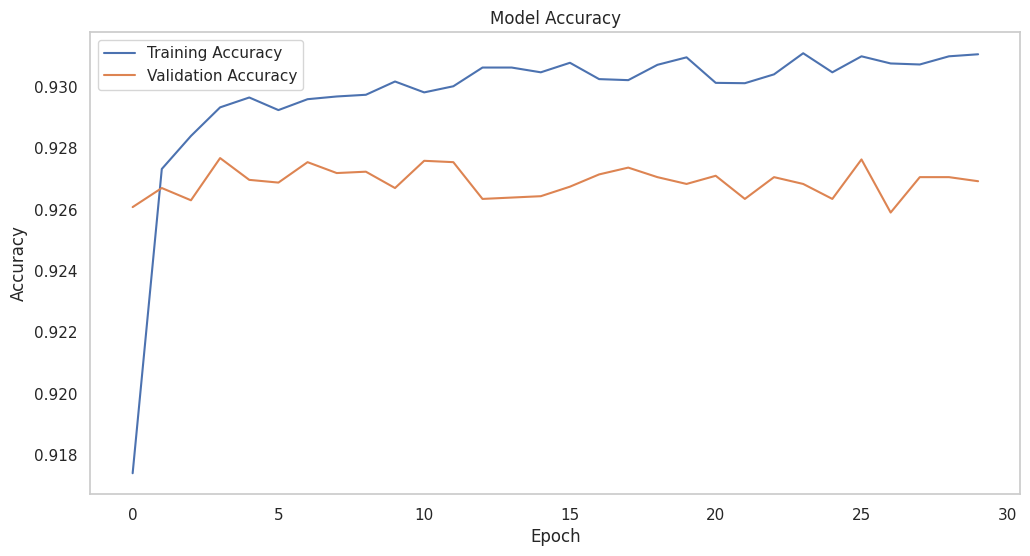

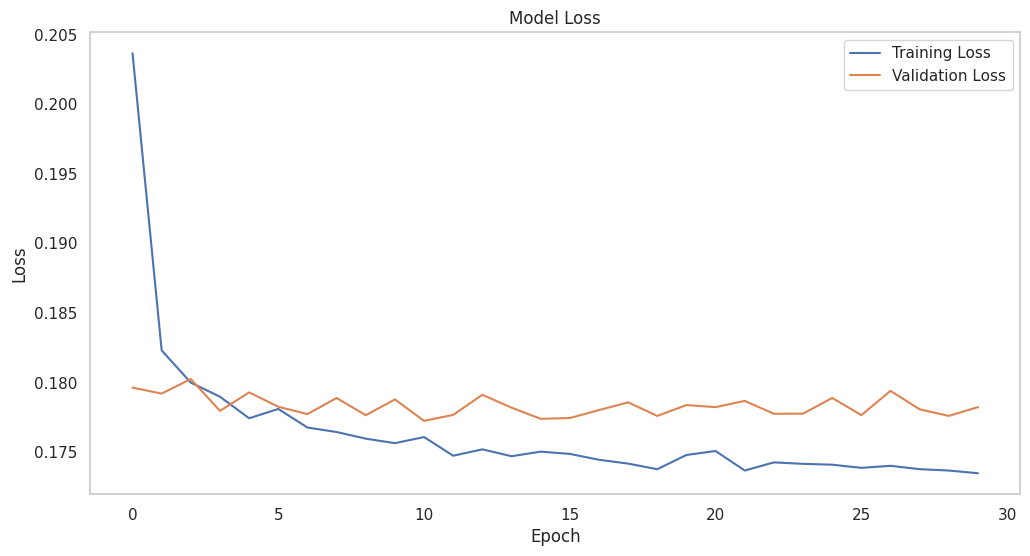

In [ ]:
# Plot the learning curve (optional)
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Evaluate on the test set
# Predicted probabilities
y_pred_prob = model.predict(X_test_scaled).flatten()

# Convert to binary classes
y_pred = (y_pred_prob >= 0.5).astype(int)

880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
# Classification Report
print("Classification Report")
print(classification_report(y_test, y_pred,
                            target_names=["No Depression", "Depression"]))

Classification Report
               precision    recall  f1-score   support

No Depression       0.95      0.96      0.96     22986
   Depression       0.82      0.79      0.80      5154

     accuracy                           0.93     28140
    macro avg       0.89      0.88      0.88     28140
 weighted avg       0.93      0.93      0.93     28140



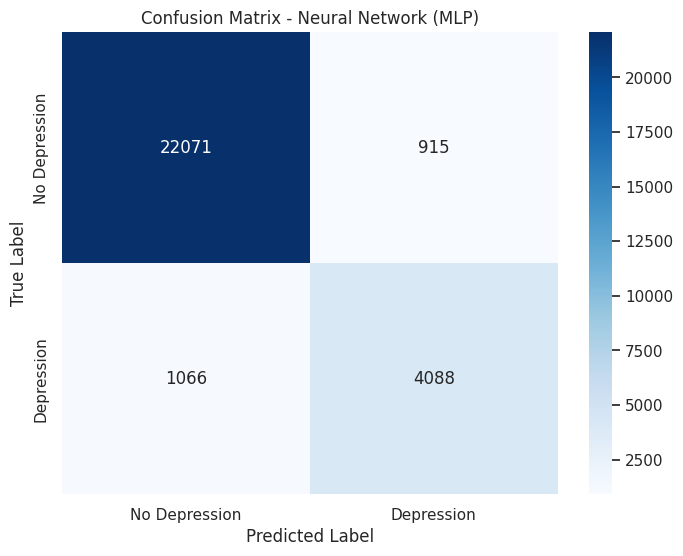

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Class labels (optional: use your own labels)
class_names = ["No Depression", "Depression"]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Neural Network (MLP)')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled).flatten()  # Get predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert to binary classes with a 0.5 threshold

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({'Model': ['Neural Network (MLP)'],  # Model name
                           'Accuracy': [accuracy]  # Calculated accuracy
                          })

# Display the DataFrame
metrics_df

In [ ]:
# Save the model in H5 format
model.save("weights.neural_network_model.h5")
print("Model saved as 'neural_network_model.h5'")

# Save standard_scaler
joblib.dump(standard_scaler, 'standard_scaler.joblib')

Model saved as 'neural_network_model.h5'


['standard_scaler.joblib']